# Analysis of video game sales, by Deborah Thomas

[link to this Video Game repository on GitHub](https://github.com/Script-Whiz/Sprint5_VideoGames_imputation.git)

<div style="background-color: rgb(255, 176, 155); padding: 10px; border-radius: 5px;">
    <h2>Introduction</h2>
</div>

#### Analysis of historic video game sales, from 1980-2016, from the (fictitional) online store called "Ice". This dataset includes sales from these three regions:
- North America
- Europe
- Japan
#### I will be analyzing sales, from these three regions, along with the following, in order to gain an understanding as to which video games will be successful:
- Video game platforms
- Year of release
- Video game genres
- Critics' scores
- Users' scores
- ESRB's ratings (Entertainment Software Rating Board)

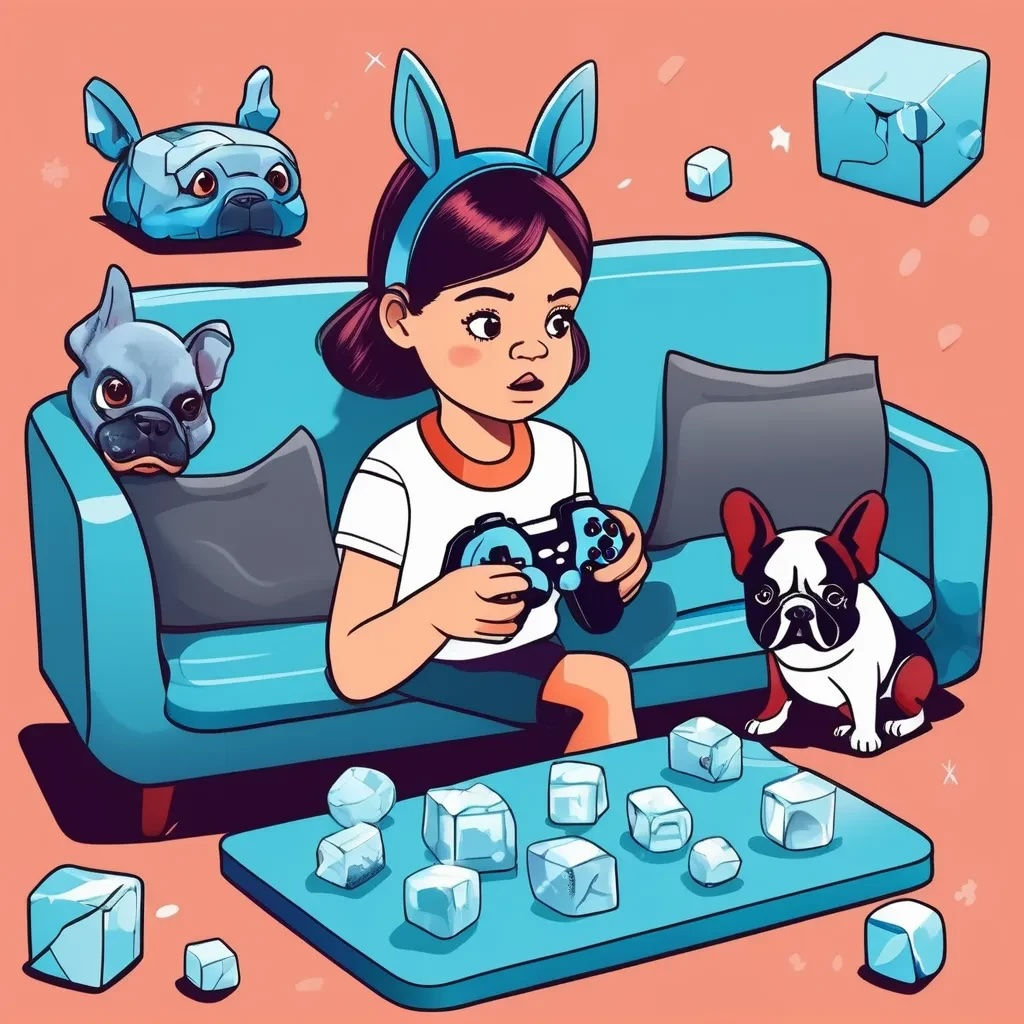

In [647]:
# Path to the image
image_path = '../girl_videoGame_dog_ice.jpeg'
# Display the image
display(Image(filename=image_path, width=200, height=200))

<div style="background-color: rgb(255, 176, 155); padding: 10px; border-radius: 5px;">
    <h2>Import libraries, and read in the dataset</h2>
</div>

In [649]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as st
from plotly.subplots import make_subplots

from IPython.display import Image, display

import random

In [650]:
try:
    games = pd.read_csv('/datasets/games.csv')  # Attempt to read from the server path
except FileNotFoundError:
    games = pd.read_csv('../datasets/games.csv')  # Fallback to the local path


display(games.head(5))

Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

<div style="background-color: rgb(255, 176, 155); padding: 10px; border-radius: 5px;">
    <h2>Basic summary of the data</h2>
</div>

In [652]:
print("This dataset has " + str(games.shape[1]) + " columns, and " + str(games.shape[0]) + " rows.")

This dataset has 11 columns, and 16715 rows.


In [653]:
games.describe()

Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        Other_sales  Critic_Score  
count  16715.000000   8137.000000  
mean       0.047342     68.967679  
std        0.186731     13.938165  
min        0.000000     13.000000  
25%        0.000000     60.000000  
50%        0.010000     71.000000  
75%        0.030000     79.000000  
max       10.570000     98.000000

#### North America had the most sales.

In [655]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [656]:
games.Critic_Score.max()

98.0

In [657]:
games.User_Score.value_counts()

User_Score
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64

#### A quick study of the data shows:
- North America had the highest video game sales overall.
    
- Column names need to be lowercase.

- 'Year_of_Release' column should be renamed to 'year', to shorten the gap between the 'Platform' column.

- 'Year_of_Release', and 'Critic_Score' should not have decimals. These datatypes will need to change to int.
- 'User_Score' appears to only go to 10, so this can stay as a decimal. But, the datatype will need to change to float.
- The 'Rating' column will need to change to the 'category' datatype.

- These columns have NaN values and / or missing data: Name, 'Year_of_Release', 'Genre', 'Critic_Score', 'User_Score', 'Rating'.
- Luckily, there is no data missing from the sales columns: 'NA_sales', 'EU_sales', 'JP_sales', 'Other_sales'. But I will be changing the names to 'sales_na', 'sales_eu', 'sales_jp', 'sales_other', so the word 'sales' reads first.

<div style="background-color: rgb(255, 176, 155); padding: 10px; border-radius: 5px;">
    <h2>Clean the data</h2>
</div>

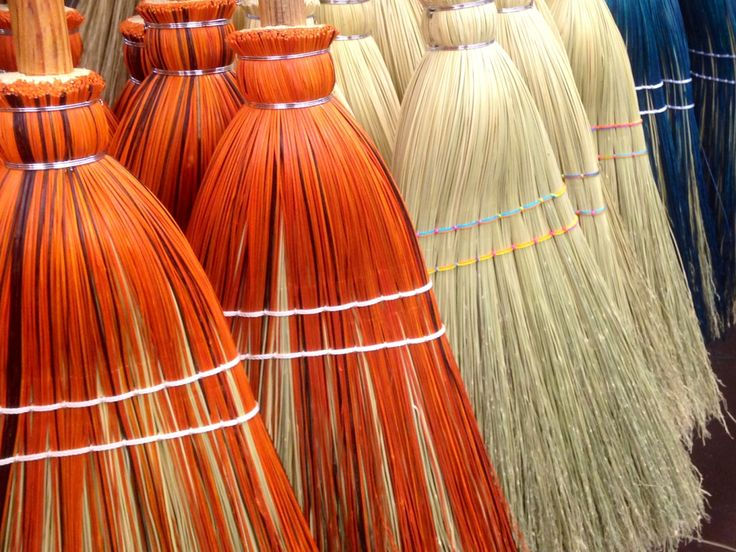

In [660]:
# Path to the image
image_path = '../brooms.jpeg'
# Display the image
display(Image(filename=image_path, width=200, height=200))

## <span style="color: coral;">Rename the column names to lowercase.</span>

In [662]:
# New column names
new_columns = ['name', 'platform', 'year', 'genre', 'sales_na', 'sales_eu', 'sales_jp', 'sales_other', 'critic_score', 'user_score', 'rating']

# Assign the new column names to the DataFrame
games.columns = new_columns

#Display dataframe with new lowercase names
display(games.head(10))

name platform    year         genre  sales_na  \
0                 Wii Sports      Wii  2006.0        Sports     41.36   
1          Super Mario Bros.      NES  1985.0      Platform     29.08   
2             Mario Kart Wii      Wii  2008.0        Racing     15.68   
3          Wii Sports Resort      Wii  2009.0        Sports     15.61   
4   Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing     11.27   
5                     Tetris       GB  1989.0        Puzzle     23.20   
6      New Super Mario Bros.       DS  2006.0      Platform     11.28   
7                   Wii Play      Wii  2006.0          Misc     13.96   
8  New Super Mario Bros. Wii      Wii  2009.0      Platform     14.44   
9                  Duck Hunt      NES  1984.0       Shooter     26.93   

   sales_eu  sales_jp  sales_other  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  
5      2.26      4.22         0.58           NaN        NaN    NaN  
6      9.14      6.50         2.88          89.0        8.5      E  
7      9.18      2.93         2.84          58.0        6.6      E  
8      6.94      4.70         2.24          87.0        8.4      E  
9      0.63      0.28         0.47           NaN        NaN    NaN

## <span style="color: coral;">Check for duplicate rows based on specific columns.</span>

<div style="background-color: hotpink; color: white; padding: 10px; border-radius: 5px; margin: 10px 0; font-size: 16px;">
    Check for duplicate rows based on only these 3 columns; 'name', 'year', 'platform'.
</div>

In [665]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16715 non-null  object 
 2   year          16446 non-null  float64
 3   genre         16713 non-null  object 
 4   sales_na      16715 non-null  float64
 5   sales_eu      16715 non-null  float64
 6   sales_jp      16715 non-null  float64
 7   sales_other   16715 non-null  float64
 8   critic_score  8137 non-null   float64
 9   user_score    10014 non-null  object 
 10  rating        9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [666]:
# Check for duplicate rows based on only these 3 columns; 'name', 'year', 'platform'.
duplicate_rows = games[games.duplicated(subset=['name', 'platform', 'year'])]

# Display the duplicate rows
print("Duplicate rows:")
print(duplicate_rows)

# Count the number of duplicate rows
num_duplicates = duplicate_rows.shape[0]
display(f"Number of duplicate rows: {num_duplicates}")

Duplicate rows:
                name platform    year   genre  sales_na  sales_eu  sales_jp  \
14244            NaN      GEN  1993.0     NaN       0.0      0.00      0.03   
16230  Madden NFL 13      PS3  2012.0  Sports       0.0      0.01      0.00   

       sales_other  critic_score user_score rating  
14244          0.0           NaN        NaN    NaN  
16230          0.0          83.0        5.5      E  


'Number of duplicate rows: 2'

#### Drop Duplicates. There are 2 duplicate rows. 

In [668]:
# Drop duplicates keeping the first occurrence and reset index
games = games.drop_duplicates(subset=['name', 'platform', 'year'], keep='first').reset_index(drop=True)

In [669]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16712 non-null  object 
 1   platform      16713 non-null  object 
 2   year          16444 non-null  float64
 3   genre         16712 non-null  object 
 4   sales_na      16713 non-null  float64
 5   sales_eu      16713 non-null  float64
 6   sales_jp      16713 non-null  float64
 7   sales_other   16713 non-null  float64
 8   critic_score  8136 non-null   float64
 9   user_score    10013 non-null  object 
 10  rating        9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### RangeIndex is now 16713, after dropping 2 rows.

## <span style="color:coral;">Clean 'year' column</span>

#### There are 269 NaN values in the 'year' column.

### <span style="color: coral;">Impute data for the 'year' column, by finding the year explicitly in the name of game.</span>

#### Some of the names of games have the year, explicitly listed as part of the title of the game. I will find just the titles that have 4 digits in their naming, and use that to impute the data for the NaN values in the 'year' column.

In [675]:
# Extract the 4-digit year from the 'name' column
year_extracted = games['name'].str.extract(r'(\d{4})')[0]

# Create a boolean mask for rows where 'name' contains a 4-digit year, and 'year' is NaN
mask = year_extracted.notna() & games['year'].isna()

# Filter the DataFrame using the mask
filtered_games = games[mask]

# Print the 'name', original 'year', and 'extracted_year' columns for verification
print("\nGames where 'name' contains a 4-digit year and 'year' column is NaN:")
filtered_games = filtered_games.assign(extracted_year=year_extracted[mask])
print(filtered_games[['name', 'year', 'extracted_year']])


Games where 'name' contains a 4-digit year and 'year' column is NaN:
                                    name  year extracted_year
183                      Madden NFL 2004   NaN           2004
377                     FIFA Soccer 2004   NaN           2004
475           wwe Smackdown vs. Raw 2006   NaN           2006
1650                 NASCAR Thunder 2003   NaN           2003
2572      PES 2009: Pro Evolution Soccer   NaN           2009
3486                     Madden NFL 2002   NaN           2002
4775                    NFL GameDay 2003   NaN           2003
5156                       NBA Live 2003   NaN           2003
5336                  Tomb Raider (2013)   NaN           2013
5655              All-Star Baseball 2005   NaN           2005
5889                       NBA Live 2003   NaN           2003
8918              All-Star Baseball 2005   NaN           2005
13195                Tour de France 2011   NaN           2011
13929                    Sega Rally 2006   NaN           2006


In [676]:
# Convert the extracted years to integers
year_extracted = pd.to_numeric(year_extracted, errors='coerce')

# This will print 'NaN' for the game 'name' that did not have a 4-digit number as part of their naming.
display(year_extracted.tail(20))

16693       NaN
16694       NaN
16695    3000.0
16696       NaN
16697       NaN
16698       NaN
16699       NaN
16700       NaN
16701       NaN
16702       NaN
16703       NaN
16704       NaN
16705       NaN
16706       NaN
16707    1000.0
16708       NaN
16709    2007.0
16710       NaN
16711       NaN
16712    2016.0
Name: 0, dtype: float64

#### I can see a 4-digit number higher than 2016, so I will have to only extract digits less than or equal to 2016. And, I might as well make sure that I only extract numbers greater or equal to 1980.

In [678]:
# Create a boolean mask for rows where 'year' is NaN and extracted year is between 1980 and 2016
mask = games['year'].isna() & year_extracted.notna() & (year_extracted >= 1980) & (year_extracted <= 2016)

# Replace the NaN values in the 'year' column with the extracted year
games.loc[mask, 'year'] = year_extracted[mask]

# Print the updated dataFrame 
print("\nUpdated DataFrame with 'year' column filled from extracted 'year' (only for between 1980 and 2016):")
display(games.head(20))


Updated DataFrame with 'year' column filled from extracted 'year' (only for between 1980 and 2016):


name platform    year  \
0                                     Wii Sports      Wii  2006.0   
1                              Super Mario Bros.      NES  1985.0   
2                                 Mario Kart Wii      Wii  2008.0   
3                              Wii Sports Resort      Wii  2009.0   
4                       Pokemon Red/Pokemon Blue       GB  1996.0   
5                                         Tetris       GB  1989.0   
6                          New Super Mario Bros.       DS  2006.0   
7                                       Wii Play      Wii  2006.0   
8                      New Super Mario Bros. Wii      Wii  2009.0   
9                                      Duck Hunt      NES  1984.0   
10                                    Nintendogs       DS  2005.0   
11                                 Mario Kart DS       DS  2005.0   
12                   Pokemon Gold/Pokemon Silver       GB  1999.0   
13                                       Wii Fit      Wii  2007.0   
14                            Kinect Adventures!     X360  2010.0   
15                                  Wii Fit Plus      Wii  2009.0   
16                            Grand Theft Auto V      PS3  2013.0   
17                 Grand Theft Auto: San Andreas      PS2  2004.0   
18                             Super Mario World     SNES  1990.0   
19  Brain Age: Train Your Brain in Minutes a Day       DS  2005.0   

           genre  sales_na  sales_eu  sales_jp  sales_other  critic_score  \
0         Sports     41.36     28.96      3.77         8.45          76.0   
1       Platform     29.08      3.58      6.81         0.77           NaN   
2         Racing     15.68     12.76      3.79         3.29          82.0   
3         Sports     15.61     10.93      3.28         2.95          80.0   
4   Role-Playing     11.27      8.89     10.22         1.00           NaN   
5         Puzzle     23.20      2.26      4.22         0.58           NaN   
6       Platform     11.28      9.14      6.50         2.88          89.0   
7           Misc     13.96      9.18      2.93         2.84          58.0   
8       Platform     14.44      6.94      4.70         2.24          87.0   
9        Shooter     26.93      0.63      0.28         0.47           NaN   
10    Simulation      9.05     10.95      1.93         2.74           NaN   
11        Racing      9.71      7.47      4.13         1.90          91.0   
12  Role-Playing      9.00      6.18      7.20         0.71           NaN   
13        Sports      8.92      8.03      3.60         2.15          80.0   
14          Misc     15.00      4.89      0.24         1.69          61.0   
15        Sports      9.01      8.49      2.53         1.77          80.0   
16        Action      7.02      9.09      0.98         3.96          97.0   
17        Action      9.43      0.40      0.41        10.57          95.0   
18      Platform     12.78      3.75      3.54         0.55           NaN   
19          Misc      4.74      9.20      4.16         2.04          77.0   

   user_score rating  
0           8      E  
1         NaN    NaN  
2         8.3      E  
3           8      E  
4         NaN    NaN  
5         NaN    NaN  
6         8.5      E  
7         6.6      E  
8         8.4      E  
9         NaN    NaN  
10        NaN    NaN  
11        8.6      E  
12        NaN    NaN  
13        7.7      E  
14        6.3      E  
15        7.4      E  
16        8.2      M  
17          9      M  
18        NaN    NaN  
19        7.9      E

In [679]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16712 non-null  object 
 1   platform      16713 non-null  object 
 2   year          16461 non-null  float64
 3   genre         16712 non-null  object 
 4   sales_na      16713 non-null  float64
 5   sales_eu      16713 non-null  float64
 6   sales_jp      16713 non-null  float64
 7   sales_other   16713 non-null  float64
 8   critic_score  8136 non-null   float64
 9   user_score    10013 non-null  object 
 10  rating        9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### There are now only 252 NaN in the 'year' column. That method of imputing cleaned up 17 NaN values.

<div style="background-color: hotpink; color: white; padding: 10px; border-radius: 5px; margin: 10px 0; font-size: 16px;">
    I will add in a check, to make sure that the imputed year is not before it's platform's release year.
</div>

### <span style="color: coral;">Impute data for the 'year' column, by finding same-name game.</span>

### I will find the most common year, for each game, then impute missing data, by filling in the 'year' with the most common year for each same-name game. But, first check to see what game's platform release year is, so that I do not impute the year that is earlier than it's platform release year. 

#### The year that a gaming platform was released would also give a clue as to what year a game was released.

In [685]:
games.platform.value_counts()

platform
PS2     2161
DS      2151
PS3     1330
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       28
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

## <span style="color:coral;">Find the release year of each platform</span>

These are the years that the various gaming platforms were released. So, the NaN 'year' values, that match these platforms cannot be earlier than their platform's release date.

#### 1977 
- 2600

#### 1983
- NES
- PC

#### 1967
- TG16

#### 1989
- GB

#### 1990
- GG
- SNES

#### 1991
- SCD

#### 1993
- 3DO

#### 1994
- NG
- PCFX
- PS
- SAT

#### 1996
- N64

#### 1999
- WS


#### 2000
- GC
- PS2

#### 2001
- GBA
- XB

#### 2002
- GEN

#### 2004
- PSP

#### 2005
- DS

#### 2005.
- X360

#### 2006
- PS3
- Wii

#### 2010
- 3DS

#### 2011
- DC

#### 2012
- WiiU

- PSV

#### 2013
- PS4
- XOne

### Make a dictionary with those platform values and platform year of release.

In [689]:
platform_release_years = {
    1967: ['PC'],
    1977: ['2600'],
    1983: ['NES'],
    1989: ['TG16', 'GB'],
    1990: ['GG'],
    1991: ['SNES', 'SCD'],
    1993: ['3DO'],
    1994: ['NG', 'PCFX', 'PS', 'SAT'],
    1996: ['N64'],
    1999: ['WS'],
    2000: ['GC', 'PS2'],
    2001: ['GBA', 'XB'],
    2002: ['GEN'],
    2004: ['PSP'],
    2005: ['DS', 'X360'],
    2006: ['PS3', 'Wii'],
    2010: ['3DS'],
    2011: ['DC'],
    2012: ['WiiU', 'PSV'],
    2013: ['PS4', 'XOne']
}

In [690]:
# Flatten the dictionary to create a list of (platform, release_year) tuples
flat_platform_years = [(platform, year) for year, platforms in platform_release_years.items() for platform in platforms]

# Convert the flattened list of tuples to a DataFrame
platform_years_df = pd.DataFrame(flat_platform_years, columns=['platform', 'release_year'])

### <span style="color: coral;">Calculate the most common year (mode) for each game.</span>

#### Filter rows where the 'year' is NaN

In [693]:
# Count of NaN values in 'year' column
nan_count_year = games['year'].isna().sum()
print(nan_count_year)

252


#### There are 252 'year' with NaN.

### Group same-name games together, where one of the games has NaN, for 'year', and another same-name game has a valid 'year'.

In [696]:
# group by 'name'
grouped_games = games.groupby('name')

In [697]:
# Initialize a list to hold the result rows
mixed_year_games = []

In [698]:
for name, group in grouped_games:
    if group['year'].isna().any() and group['year'].notna().any():
        mixed_year_games.append(group)

In [699]:
# Concatenate the results into a single DataFrame
mixed_year_games_df = pd.concat(mixed_year_games)

In [700]:
# Sort the resulting DataFrame by 'name'
sorted_mixed_year_games_df = mixed_year_games_df.sort_values(by='name')

print("Games with NaN, in 'year', that have same-name games with a valid year.")
# Display the result
display(sorted_mixed_year_games_df)

Games with NaN, in 'year', that have same-name games with a valid year.


name platform    year    genre  \
4800   AKB1/48: Idol to Guam de Koishitara...      PSP  2011.0     Misc   
16291  AKB1/48: Idol to Guam de Koishitara...     X360     NaN     Misc   
16156            Aquaman: Battle for Atlantis       XB     NaN   Action   
16351            Aquaman: Battle for Atlantis       GC  2003.0   Action   
13609                        Battle vs. Chess      PS3     NaN     Misc   
...                                       ...      ...     ...      ...   
6670                         Wheel of Fortune      N64  1997.0     Misc   
14052                         Without Warning      PS2  2005.0  Shooter   
15815                         Without Warning       XB     NaN  Shooter   
6077                           World of Tanks       PC  2011.0  Shooter   
14684                          World of Tanks     X360     NaN  Shooter   

       sales_na  sales_eu  sales_jp  sales_other  critic_score user_score  \
4800       0.00      0.00      0.40         0.00           NaN        NaN   
16291      0.00      0.00      0.01         0.00           NaN        NaN   
16156      0.01      0.00      0.00         0.00          26.0        2.7   
16351      0.01      0.00      0.00         0.00          27.0        3.1   
13609      0.00      0.03      0.00         0.01           NaN        NaN   
...         ...       ...       ...          ...           ...        ...   
6670       0.20      0.05      0.00         0.00           NaN        NaN   
14052      0.02      0.01      0.00         0.00          45.0        6.5   
15815      0.01      0.00      0.00         0.00          45.0          2   
6077       0.00      0.23      0.00         0.05          80.0        3.7   
14684      0.00      0.03      0.00         0.00           NaN        5.2   

      rating  
4800     NaN  
16291    NaN  
16156      T  
16351      T  
13609      T  
...      ...  
6670     NaN  
14052      M  
15815      M  
6077       T  
14684    NaN  

[294 rows x 11 columns]

#### So, there are some valid years that can be imputed for NaN 'year'.

In [702]:
# Create a dictionary to map valid years to each game name
valid_year_dict = {name: group['year'].dropna().iloc[0] for name, group in grouped_games if group['year'].notna().any()}

### <span style="color: coral;">Impute data for 'year' using year from same-name game.</span>

In [704]:
# Fill NaN values with the valid year from the same name group
games['year'] = games.apply(lambda row: valid_year_dict[row['name']] if pd.isna(row['year']) and row['name'] in valid_year_dict else row['year'], axis=1)

sorted_games = games.sort_values(by='name')

print("DataFrame after imputing missing years:")
display(sorted_games.tail(20))

DataFrame after imputing missing years:


name platform    year     genre  sales_na  \
958                      inFAMOUS 2      PS3  2011.0    Action      1.05   
529            inFAMOUS: Second Son      PS4  2014.0    Action      1.28   
9897                         nail'd      PS3  2010.0    Racing      0.08   
10650                        nail'd     X360  2010.0    Racing      0.08   
2583      pro evolution soccer 2011      PSP  2010.0    Sports      0.05   
12648     pro evolution soccer 2011       PC  2010.0    Sports      0.00   
4664      pro evolution soccer 2011      PS2  2010.0    Sports      0.04   
7149      pro evolution soccer 2011      Wii  2010.0    Sports      0.07   
3304      pro evolution soccer 2011     X360  2010.0    Sports      0.09   
649       pro evolution soccer 2011      PS3  2010.0    Sports      0.29   
16509           th!nk Logic Trainer      Wii  2009.0    Puzzle      0.01   
10843                    thinkSMART       DS  2010.0      Misc      0.09   
14452            thinkSMART FAMILY!      Wii  2010.0      Misc      0.03   
16492    thinkSMART: Chess for Kids       DS  2011.0      Misc      0.01   
645                    uDraw Studio      Wii  2010.0      Misc      1.65   
15611  uDraw Studio: Instant Artist     X360  2011.0      Misc      0.01   
8280   uDraw Studio: Instant Artist      Wii  2011.0      Misc      0.06   
475      wwe Smackdown vs. Raw 2006      PS2  2006.0  Fighting      1.57   
9134   ¡Shin Chan Flipa en colores!       DS  2007.0  Platform      0.00   
659                             NaN      GEN  1993.0       NaN      1.78   

       sales_eu  sales_jp  sales_other  critic_score user_score rating  
958        0.47      0.08         0.22          83.0        8.4      T  
529        0.98      0.07         0.46          80.0        7.9      T  
9897       0.02      0.00         0.02          66.0        6.2   E10+  
10650      0.02      0.00         0.01          64.0        7.1   E10+  
2583       0.30      0.29         0.16          74.0        5.8      E  
12648      0.05      0.00         0.01          79.0        NaN    NaN  
4664       0.21      0.05         0.11           NaN        6.7      E  
7149       0.10      0.03         0.02          78.0        5.4      E  
3304       0.44      0.00         0.07          79.0        5.9      E  
649        1.17      0.54         0.41          77.0        6.8      E  
16509      0.00      0.00         0.00           NaN        NaN    NaN  
10843      0.00      0.00         0.01           NaN        tbd      E  
14452      0.00      0.00         0.00           NaN        tbd      E  
16492      0.00      0.00         0.00           NaN        tbd      E  
645        0.57      0.00         0.20          71.0        tbd      E  
15611      0.01      0.00         0.00          54.0        5.7      E  
8280       0.09      0.00         0.02           NaN        tbd      E  
475        1.02      0.00         0.41           NaN        NaN    NaN  
9134       0.00      0.14         0.00           NaN        NaN    NaN  
659        0.53      0.00         0.08           NaN        NaN    NaN

In [705]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16712 non-null  object 
 1   platform      16713 non-null  object 
 2   year          16574 non-null  float64
 3   genre         16712 non-null  object 
 4   sales_na      16713 non-null  float64
 5   sales_eu      16713 non-null  float64
 6   sales_jp      16713 non-null  float64
 7   sales_other   16713 non-null  float64
 8   critic_score  8136 non-null   float64
 9   user_score    10013 non-null  object 
 10  rating        9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### The method, of imputing 'year', with same-name games, has cleaned up 113 NaN.

### <span style="color: coral;">Impute data for 'year' using mode of platform's year.</span>

In [708]:
# Group by 'platform' and calculate the mode for 'year'
common_year_platform = games.groupby('platform')['year'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Convert the Series to a dictionary
common_year_dict = common_year_platform.to_dict()

# Print the result
print("Common year for each platform:")
print(common_year_platform)

Common year for each platform:
platform
2600    1981.0
3DO     1995.0
3DS     2011.0
DC      2000.0
DS      2008.0
GB      2000.0
GBA     2002.0
GC      2002.0
GEN     1994.0
GG      1992.0
N64     1999.0
NES     1986.0
NG      1994.0
PC      2011.0
PCFX    1996.0
PS      1998.0
PS2     2002.0
PS3     2011.0
PS4     2016.0
PSP     2006.0
PSV     2015.0
SAT     1995.0
SCD     1994.0
SNES    1995.0
TG16    1995.0
WS      1999.0
Wii     2009.0
WiiU    2013.0
X360    2011.0
XB      2003.0
XOne    2016.0
Name: year, dtype: float64


In [709]:
# Define a function to fill NaN values in the 'year' column using the common year dictionary
def fill_year(row, common_year_dict):
    if pd.isna(row['year']):
        return common_year_dict.get(row['platform'], row['year'])
    return row['year']

In [710]:
# Apply the function to fill NaN years
games['year'] = games.apply(lambda row: fill_year(row, common_year_dict), axis=1)

In [711]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16712 non-null  object 
 1   platform      16713 non-null  object 
 2   year          16713 non-null  float64
 3   genre         16712 non-null  object 
 4   sales_na      16713 non-null  float64
 5   sales_eu      16713 non-null  float64
 6   sales_jp      16713 non-null  float64
 7   sales_other   16713 non-null  float64
 8   critic_score  8136 non-null   float64
 9   user_score    10013 non-null  object 
 10  rating        9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### This method of imputing has cleaned up the remainder, 139, of the NaN for 'year'.

In [713]:
# Count of NaN values in 'year' column
nan_count_year = games['year'].isna().sum()
print(nan_count_year)

0


In [714]:
games['year'] = games['year'].astype(int)

In [715]:
display(games.head(10))

name platform  year         genre  sales_na  sales_eu  \
0                 Wii Sports      Wii  2006        Sports     41.36     28.96   
1          Super Mario Bros.      NES  1985      Platform     29.08      3.58   
2             Mario Kart Wii      Wii  2008        Racing     15.68     12.76   
3          Wii Sports Resort      Wii  2009        Sports     15.61     10.93   
4   Pokemon Red/Pokemon Blue       GB  1996  Role-Playing     11.27      8.89   
5                     Tetris       GB  1989        Puzzle     23.20      2.26   
6      New Super Mario Bros.       DS  2006      Platform     11.28      9.14   
7                   Wii Play      Wii  2006          Misc     13.96      9.18   
8  New Super Mario Bros. Wii      Wii  2009      Platform     14.44      6.94   
9                  Duck Hunt      NES  1984       Shooter     26.93      0.63   

   sales_jp  sales_other  critic_score user_score rating  
0      3.77         8.45          76.0          8      E  
1      6.81         0.77           NaN        NaN    NaN  
2      3.79         3.29          82.0        8.3      E  
3      3.28         2.95          80.0          8      E  
4     10.22         1.00           NaN        NaN    NaN  
5      4.22         0.58           NaN        NaN    NaN  
6      6.50         2.88          89.0        8.5      E  
7      2.93         2.84          58.0        6.6      E  
8      4.70         2.24          87.0        8.4      E  
9      0.28         0.47           NaN        NaN    NaN

### 'year' is clean now.

## <span style="color:coral;">Clean 'name' column.</span>

In [718]:
nan_name = games[games['name'].isna()]
display(nan_name)

name platform  year genre  sales_na  sales_eu  sales_jp  sales_other  \
659  NaN      GEN  1993   NaN      1.78      0.53       0.0         0.08   

     critic_score user_score rating  
659           NaN        NaN    NaN

In [719]:
# Check for duplicates in the subset where 'name' is NaN
nan_name_duplicates = nan_name.duplicated().any()
display(nan_name_duplicates)

False

#### There is one game name missing. There is not a duplicate of that one row. But, there is sales data that can be used for the platform GEN. So, I will not delete this row.

In [721]:
# Replace NaN values in the 'name' column with 'Unknown'
games['name'] = games['name'].fillna('Unknown')

In [722]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16713 non-null  object 
 2   year          16713 non-null  int64  
 3   genre         16712 non-null  object 
 4   sales_na      16713 non-null  float64
 5   sales_eu      16713 non-null  float64
 6   sales_jp      16713 non-null  float64
 7   sales_other   16713 non-null  float64
 8   critic_score  8136 non-null   float64
 9   user_score    10013 non-null  object 
 10  rating        9948 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


### 'name' is clean now.

## <span style="color:coral;">Clean 'critic_score' column</span>

#### There are currently 8577 NaN values, which is almost half of the rows in the 'critic_score' column.

In [726]:
games.critic_score.value_counts()

critic_score
70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
20.0      3
21.0      1
17.0      1
22.0      1
13.0      1
Name: count, Length: 82, dtype: int64

In [727]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16713 non-null  object 
 2   year          16713 non-null  int64  
 3   genre         16712 non-null  object 
 4   sales_na      16713 non-null  float64
 5   sales_eu      16713 non-null  float64
 6   sales_jp      16713 non-null  float64
 7   sales_other   16713 non-null  float64
 8   critic_score  8136 non-null   float64
 9   user_score    10013 non-null  object 
 10  rating        9948 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


#### There are 8577 missing 'critic_score'.

### <span style="color: coral;">Impute 'critic_score' with 'critic_score' of same named games.</span>

In [730]:
#find percentage of each name-group's missing values from 'critic_score'
missing_criticScore_ratio = games.groupby('name')['critic_score'].apply(lambda x: x.isnull().mean())

missing_criticScore_ratio = missing_criticScore_ratio.sort_values(ascending=False)

#1 is 100%  .5 is 50% , etc.
print("Percentage of same-name groups' 'critic_score' that is missing:")
display(missing_criticScore_ratio.sample(30))

Percentage of same-name groups' 'critic_score' that is missing:


name
FIFA Soccer 10                                   0.285714
Unreal II: The Awakening                         0.000000
Custom Robo V2                                   1.000000
Whac-A-Mole                                      1.000000
Guitar Hero: On Tour Decades                     0.000000
Over the Hedge                                   0.000000
Bleach GC: Tasogare Ni Mamieru Shinigami         1.000000
Tokyo Xtreme Racer DRIFT                         0.000000
Ford Racing                                      0.000000
Mario & Sonic at the Rio 2016 Olympic Games      1.000000
Super Trucks Racing                              0.000000
Onigokko! Portable                               1.000000
Zettai Onkan Otoda Master                        1.000000
The Sims 3: Generations                          0.000000
RealSports Tennis                                1.000000
Fantastic Four                                   1.000000
NANA: Live Staff Daiboshuu! Shoshinsha Kangei    1.000000
Petz: Dog

#### A lot of the groups have 100% of the group missing its value for 'critic_score'.

In [732]:
# Function to impute missing values conditionally
def conditional_impute(group):
    if missing_criticScore_ratio[group.name] < 1.0:
        return group.ffill().bfill()
    return group
    
# Apply conditional imputation
games['critic_score'] = games.groupby('name')['critic_score'].transform(conditional_impute)

In [733]:
# Identify game names that occur more than once
same_name_games = games[games['name'].isin(games['name'].value_counts()[games['name'].value_counts() > 1].index)]

# Sort by 'name' to see same-name games together
sorted_same_name_games = same_name_games.sort_values(by='name')

In [734]:
result = sorted_same_name_games[['name', 'platform', 'critic_score']]
print("Same-name games, sorted by name, with their platforms and critic scores:")
display(result.head(20))

Same-name games, sorted by name, with their platforms and critic scores:


name platform  \
3862                                Frozen: Olaf's Quest       DS   
3358                                Frozen: Olaf's Quest      3DS   
14657                             007: Quantum of Solace       PC   
3120                              007: Quantum of Solace      Wii   
1285                              007: Quantum of Solace     X360   
1785                              007: Quantum of Solace      PS3   
9507                              007: Quantum of Solace       DS   
4475                              007: Quantum of Solace      PS2   
2243                        007: The World is not Enough       PS   
1204                        007: The World is not Enough      N64   
15090                                  11eyes: CrossOver     X360   
15655                                  11eyes: CrossOver      PSP   
10076                   18 Wheeler: American Pro Trucker       GC   
4805                    18 Wheeler: American Pro Trucker      PS2   
8879                                    187: Ride or Die      PS2   
12283                                   187: Ride or Die       XB   
9966   2 in 1 Combo Pack: Sonic Heroes / Super Monkey...     X360   
3761   2 in 1 Combo Pack: Sonic Heroes / Super Monkey...       XB   
7820                                 2002 FIFA World Cup       XB   
3395                                 2002 FIFA World Cup      PS2   

       critic_score  
3862            NaN  
3358            NaN  
14657          70.0  
3120           54.0  
1285           65.0  
1785           65.0  
9507           65.0  
4475           54.0  
2243           61.0  
1204           61.0  
15090           NaN  
15655           NaN  
10076          52.0  
4805           61.0  
8879           52.0  
12283          51.0  
9966            NaN  
3761            NaN  
7820           79.0  
3395           73.0

In [735]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16713 non-null  object 
 2   year          16713 non-null  int64  
 3   genre         16712 non-null  object 
 4   sales_na      16713 non-null  float64
 5   sales_eu      16713 non-null  float64
 6   sales_jp      16713 non-null  float64
 7   sales_other   16713 non-null  float64
 8   critic_score  9097 non-null   float64
 9   user_score    10013 non-null  object 
 10  rating        9948 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


#### Imputing with this method got rid of 520 NaN.

### Fill remaining NaN, in 'critic_score' with '0'. Change datatype to int64.

In [738]:
# Change all NaN values in 'critic_score' to 0
games['critic_score'] = games['critic_score'].fillna(0)

In [739]:
games['critic_score'] = games['critic_score'].astype(np.int64)

#### There are 7616 '0' values in 'critic_score' now.

In [741]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16713 non-null  object 
 2   year          16713 non-null  int64  
 3   genre         16712 non-null  object 
 4   sales_na      16713 non-null  float64
 5   sales_eu      16713 non-null  float64
 6   sales_jp      16713 non-null  float64
 7   sales_other   16713 non-null  float64
 8   critic_score  16713 non-null  int64  
 9   user_score    10013 non-null  object 
 10  rating        9948 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 1.4+ MB


### 'critic_score' is clean now.

## <span style="color:coral;">Clean 'user_score' column</span>

In [744]:
### <span style="color: coral;">First, get rid of NaN from 'user_score' column.</span>

In [745]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16713 non-null  object 
 2   year          16713 non-null  int64  
 3   genre         16712 non-null  object 
 4   sales_na      16713 non-null  float64
 5   sales_eu      16713 non-null  float64
 6   sales_jp      16713 non-null  float64
 7   sales_other   16713 non-null  float64
 8   critic_score  16713 non-null  int64  
 9   user_score    10013 non-null  object 
 10  rating        9948 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 1.4+ MB


#### There are 10013 NaN in 'user_score'.

### <span style="color: coral;">Check for 'tbd' values.</span>

In [748]:
# Check for the presence of 'tbd' in the user_score column
has_tbd = 'tbd' in games['user_score'].values
print(has_tbd)

True


In [749]:
# convert to numeric values
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

In [750]:
# Check for the presence of 'tbd' in the user_score column
has_tbd = 'tbd' in games['user_score'].values
print(has_tbd)

False


In [751]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16713 non-null  object 
 2   year          16713 non-null  int64  
 3   genre         16712 non-null  object 
 4   sales_na      16713 non-null  float64
 5   sales_eu      16713 non-null  float64
 6   sales_jp      16713 non-null  float64
 7   sales_other   16713 non-null  float64
 8   critic_score  16713 non-null  int64  
 9   user_score    7589 non-null   float64
 10  rating        9948 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


#### That got rid of 2424 'tbd' values.

In [753]:
# Identify rows where 'user_score' is NaN due to coercion of non-numeric values
non_numeric_mask = games['user_score'].isna()

In [754]:
# Extract rows with non-numeric 'user_score' values
non_numeric_values = games[non_numeric_mask]

In [755]:
# Display the non-numeric values
print("\nRows with non-numeric 'user_score' values:")
print(non_numeric_values[['name', 'user_score']])


Rows with non-numeric 'user_score' values:
                                name  user_score
1                  Super Mario Bros.         NaN
4           Pokemon Red/Pokemon Blue         NaN
5                             Tetris         NaN
9                          Duck Hunt         NaN
10                        Nintendogs         NaN
...                              ...         ...
16708  Samurai Warriors: Sanada Maru         NaN
16709               LMA Manager 2007         NaN
16710        Haitaka no Psychedelica         NaN
16711               Spirits & Spells         NaN
16712            Winning Post 8 2016         NaN

[9124 rows x 2 columns]


#### There are 9124 NaN values in 'user_score'

In [757]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16713 non-null  object 
 2   year          16713 non-null  int64  
 3   genre         16712 non-null  object 
 4   sales_na      16713 non-null  float64
 5   sales_eu      16713 non-null  float64
 6   sales_jp      16713 non-null  float64
 7   sales_other   16713 non-null  float64
 8   critic_score  16713 non-null  int64  
 9   user_score    7589 non-null   float64
 10  rating        9948 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


### <span style="color: coral;">Change 'user_score' datatype to float.</span>

In [759]:
# Change 'user_score' from float to int type.
games['user_score'] = games['user_score'].astype(float)

In [760]:
games['user_score'].value_counts()

user_score
7.8    324
8.0    290
8.2    282
8.3    254
8.5    253
      ... 
1.5      2
0.3      2
1.1      2
0.0      1
9.7      1
Name: count, Length: 95, dtype: int64

### <span style="color: coral;">Need to make sure that there are no '0' in 'user_score' before replacing NaN with '0'.</span>

<div style="background-color: lightpink; color: white; padding: 10px; border-radius: 5px; margin: 10px 0; font-size: 16px;">
    Checking to make sure that there are no '0' in 'user_score' before replacing NaN with '0'.
</div>

In [763]:
# Count the number of 0 values in 'user_score'
zero_count_userScore = (games['user_score'] == 0).sum()
print(zero_count_userScore)

1


In [764]:
# Identify rows with 0 in 'user_score'
rows_with_zero_userScore = games[games['user_score'] == 0]

display(rows_with_zero_userScore)

name platform  year      genre  sales_na  \
2835  My Little Pony: Pinkie Pie's Party       DS  2008  Adventure      0.66   

      sales_eu  sales_jp  sales_other  critic_score  user_score rating  
2835       0.0       0.0         0.06             0         0.0      E

#### There is only 1 game that has '0' for a 'user_score' value. It did not have any sales in Europe, nor Japan. It had low sales in North America. It was not a very popular game. I think that the '0' is in 'critic_score, because the game was never scored by a critic. I'm going to continue on to change the remainder of NaN to '0'. Later on, when making graphs, I will only graph 'user_score' higher than 0.

In [766]:
games['user_score'] = games['user_score'].fillna(0)

<div style="background-color: lightpink; color: white; padding: 10px; border-radius: 5px; margin: 10px 0; font-size: 16px;">
    I did not delete any rows. I also checked for '0' before changing NaN to '0'.
</div>

In [768]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16713 non-null  object 
 2   year          16713 non-null  int64  
 3   genre         16712 non-null  object 
 4   sales_na      16713 non-null  float64
 5   sales_eu      16713 non-null  float64
 6   sales_jp      16713 non-null  float64
 7   sales_other   16713 non-null  float64
 8   critic_score  16713 non-null  int64  
 9   user_score    16713 non-null  float64
 10  rating        9948 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


### user_score is clean now.

## <span style="color:coral;">Clean 'rating' column.</span>

### Year of introduction of ESRB ratings:

- The 'T' rating was introduced in the year 1994.
- The 'E' rating was introduced in the year 1998.
- The 'E10+' rating was introduced in the year 2005.
- The 'M' rating was introduced in the year 1994.

In [773]:
games.rating.value_counts()

rating
E       3989
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: count, dtype: int64

In [774]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16713 non-null  object 
 2   year          16713 non-null  int64  
 3   genre         16712 non-null  object 
 4   sales_na      16713 non-null  float64
 5   sales_eu      16713 non-null  float64
 6   sales_jp      16713 non-null  float64
 7   sales_other   16713 non-null  float64
 8   critic_score  16713 non-null  int64  
 9   user_score    16713 non-null  float64
 10  rating        9948 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


### <span style="color: coral;">Check for 'tbd' values.</span>

In [776]:
# Check for the presence of 'tbd' in the user_score column
has_tbd = 'tbd' in games['user_score'].values
print(has_tbd)

False


#### There are 6765 NaN values. There are no 'tbd' values.

### <span style="color: coral;">Find out if there are same-name games, with one of the same-name games having a NaN rating.</span>

### Are there same-named games?

In [780]:
# Find duplicate names
duplicate_names = games[games['name'].duplicated(keep=False)]

duplicate_names_sorted = duplicate_names.sort_values(by='name')

print("Duplicate name games with 'rating' column:")
display(duplicate_names_sorted[['name', 'genre', 'user_score', 'rating']].tail(45))

Duplicate name games with 'rating' column:


name       genre  user_score rating
11725    Zero Escape: Zero Time Dilemma   Adventure         8.5      M
12405    Zero Escape: Zero Time Dilemma   Adventure         8.3      M
12761                            ZombiU      Action         0.0    NaN
16643                            ZombiU      Action         0.0    NaN
2055                             ZombiU      Action         7.7      M
10316               Zombie Army Trilogy     Shooter         7.2    NaN
7539                Zombie Army Trilogy     Shooter         6.8    NaN
7650   Zone of the Enders HD Collection  Simulation         8.8      M
4577   Zone of the Enders HD Collection  Simulation         8.0      M
8528                       Zoo Hospital  Simulation         0.0      E
14110                      Zoo Hospital  Simulation         0.0      E
11642                 Zoo Tycoon (2013)  Simulation         0.0    NaN
5190                  Zoo Tycoon (2013)  Simulation         0.0    NaN
14997                           ZooCube      Puzzle         6.1      E
13251                           ZooCube      Puzzle         0.0      E
119                       Zumba Fitness      Sports         0.0      E
669                       Zumba Fitness      Sports         5.5      E
3516                      Zumba Fitness      Sports         3.8      E
13172                Zumba Fitness Core        Misc         6.7   E10+
12439                Zumba Fitness Core        Misc         0.0   E10+
6878         Zumba Fitness: World Party        Misc         6.2      E
7137         Zumba Fitness: World Party        Misc         0.0      E
10315                     [Prototype 2]      Action         6.4      M
2592                      [Prototype 2]      Action         7.0      M
2760                      [Prototype 2]      Action         6.8      M
1611                        [Prototype]      Action         7.7      M
1503                        [Prototype]      Action         7.8      M
7447                          de Blob 2    Platform         7.1   E10+
8125                          de Blob 2    Platform         8.1   E10+
8793                          de Blob 2    Platform         7.5   E10+
10140                         de Blob 2    Platform         8.2      E
2864                             iCarly   Adventure         8.3      E
4307                             iCarly   Adventure         0.0      E
10791        iCarly 2: iJoin The Click!   Adventure         9.0      E
6296         iCarly 2: iJoin The Click!   Adventure         0.0      E
10650                            nail'd      Racing         7.1   E10+
9897                             nail'd      Racing         6.2   E10+
649           pro evolution soccer 2011      Sports         6.8      E
12648         pro evolution soccer 2011      Sports         0.0    NaN
4664          pro evolution soccer 2011      Sports         6.7      E
7149          pro evolution soccer 2011      Sports         5.4      E
2583          pro evolution soccer 2011      Sports         5.8      E
3304          pro evolution soccer 2011      Sports         5.9      E
8280       uDraw Studio: Instant Artist        Misc         0.0      E
15611      uDraw Studio: Instant Artist        Misc         5.7      E

#### Yes there are. I can take the valid 'rating', from same-named games, and impute that for same-named games that have NaN 'rating'.

### <span style="color: coral;">Impute NaN, in the 'rating' column, with the valid 'rating', from a same-name game.</span>

In [783]:
# Opt-in to the future behavior to avoid the warning
#pd.set_option('future.no_silent_downcasting', True)

In [784]:
# Ensure the 'rating' column is of a numeric type, using pd.to_numeric
games['rating'] = pd.to_numeric(games['rating'], errors='coerce')

# Group by 'name' and use the transform function to propagate ratings
games['rating'] = games.groupby('name')['rating'].transform(lambda x: x.ffill().bfill())

In [785]:
# Check to see if data was imputed
games_sorted = games.sort_values(by='name')
display(games_sorted.tail(30))

name platform  year      genre  sales_na  \
8884                   eJay Clubworld      PS2  2002       Misc      0.07   
11011                      echochrome      PSP  2008     Puzzle      0.00   
16387   ef - a fairy tale of the two.      PS2  2010  Adventure      0.00   
12190                        everGirl      GBA  2005  Adventure      0.05   
12065  futureU: The Prep Game for SAT       DS  2008       Misc      0.06   
16258     htoL#NiQ: The Firefly Diary      PSV  2014   Platform      0.00   
4307                           iCarly      Wii  2009  Adventure      0.42   
2864                           iCarly       DS  2009  Adventure      0.66   
6296       iCarly 2: iJoin The Click!       DS  2010  Adventure      0.25   
10791      iCarly 2: iJoin The Click!      Wii  2010  Adventure      0.08   
491                          inFAMOUS      PS3  2009     Action      1.76   
958                        inFAMOUS 2      PS3  2011     Action      1.05   
529              inFAMOUS: Second Son      PS4  2014     Action      1.28   
9897                           nail'd      PS3  2010     Racing      0.08   
10650                          nail'd     X360  2010     Racing      0.08   
2583        pro evolution soccer 2011      PSP  2010     Sports      0.05   
12648       pro evolution soccer 2011       PC  2010     Sports      0.00   
4664        pro evolution soccer 2011      PS2  2010     Sports      0.04   
7149        pro evolution soccer 2011      Wii  2010     Sports      0.07   
3304        pro evolution soccer 2011     X360  2010     Sports      0.09   
649         pro evolution soccer 2011      PS3  2010     Sports      0.29   
16509             th!nk Logic Trainer      Wii  2009     Puzzle      0.01   
10843                      thinkSMART       DS  2010       Misc      0.09   
14452              thinkSMART FAMILY!      Wii  2010       Misc      0.03   
16492      thinkSMART: Chess for Kids       DS  2011       Misc      0.01   
645                      uDraw Studio      Wii  2010       Misc      1.65   
15611    uDraw Studio: Instant Artist     X360  2011       Misc      0.01   
8280     uDraw Studio: Instant Artist      Wii  2011       Misc      0.06   
475        wwe Smackdown vs. Raw 2006      PS2  2006   Fighting      1.57   
9134     ¡Shin Chan Flipa en colores!       DS  2007   Platform      0.00   

       sales_eu  sales_jp  sales_other  critic_score  user_score  rating  
8884       0.06      0.00         0.02            69         8.6     NaN  
11011      0.01      0.08         0.00            79         7.7     NaN  
16387      0.00      0.01         0.00             0         0.0     NaN  
12190      0.02      0.00         0.00             0         0.0     NaN  
12065      0.00      0.00         0.01             0         0.0     NaN  
16258      0.00      0.01         0.00            58         7.7     NaN  
4307       0.00      0.00         0.03             0         0.0     NaN  
2864       0.01      0.00         0.05             0         8.3     NaN  
6296       0.00      0.00         0.02             0         0.0     NaN  
10791      0.01      0.00         0.01             0         9.0     NaN  
491        0.68      0.12         0.37            85         8.3     NaN  
958        0.47      0.08         0.22            83         8.4     NaN  
529        0.98      0.07         0.46            80         7.9     NaN  
9897       0.02      0.00         0.02            66         6.2     NaN  
10650      0.02      0.00         0.01            64         7.1     NaN  
2583       0.30      0.29         0.16            74         5.8     NaN  
12648      0.05      0.00         0.01            79         0.0     NaN  
4664       0.21      0.05         0.11            79         6.7     NaN  
7149       0.10      0.03         0.02            78         5.4     NaN  
3304       0.44      0.00         0.07            79         5.9     NaN  
649        1.17      0.54         0.41            77         6.8     N

In [786]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16713 non-null  object 
 2   year          16713 non-null  int64  
 3   genre         16712 non-null  object 
 4   sales_na      16713 non-null  float64
 5   sales_eu      16713 non-null  float64
 6   sales_jp      16713 non-null  float64
 7   sales_other   16713 non-null  float64
 8   critic_score  16713 non-null  int64  
 9   user_score    16713 non-null  float64
 10  rating        0 non-null      float64
dtypes: float64(6), int64(2), object(3)
memory usage: 1.4+ MB


#### This method of imputing cleaned up 437 NaN.

### <span style="color: coral;">Fill the remainder of 6328 NaN with "None".</span>

In [789]:
#Replace the remainder of NaN values with "None".
games['rating'] = games['rating'].fillna('None')

In [790]:
games['rating'] = games['rating'].astype('category')

In [791]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   name          16713 non-null  object  
 1   platform      16713 non-null  object  
 2   year          16713 non-null  int64   
 3   genre         16712 non-null  object  
 4   sales_na      16713 non-null  float64 
 5   sales_eu      16713 non-null  float64 
 6   sales_jp      16713 non-null  float64 
 7   sales_other   16713 non-null  float64 
 8   critic_score  16713 non-null  int64   
 9   user_score    16713 non-null  float64 
 10  rating        16713 non-null  category
dtypes: category(1), float64(5), int64(2), object(3)
memory usage: 1.3+ MB


### 'rating' column is clean.

## <span style="color:coral;">Clean 'genre' column.</span>

In [794]:
nan_genre = games[games['genre'].isna()]
display(nan_genre)

name platform  year genre  sales_na  sales_eu  sales_jp  sales_other  \
659  Unknown      GEN  1993   NaN      1.78      0.53       0.0         0.08   

     critic_score  user_score rating  
659             0         0.0   None

In [795]:
# Fill NaN values in 'genre' column
games['genre'] = games['genre'].fillna('Unknown')

In [796]:
nan_genre = games[games['genre'].isna()]
display(nan_genre)

Empty DataFrame
Columns: [name, platform, year, genre, sales_na, sales_eu, sales_jp, sales_other, critic_score, user_score, rating]
Index: []

In [797]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   name          16713 non-null  object  
 1   platform      16713 non-null  object  
 2   year          16713 non-null  int64   
 3   genre         16713 non-null  object  
 4   sales_na      16713 non-null  float64 
 5   sales_eu      16713 non-null  float64 
 6   sales_jp      16713 non-null  float64 
 7   sales_other   16713 non-null  float64 
 8   critic_score  16713 non-null  int64   
 9   user_score    16713 non-null  float64 
 10  rating        16713 non-null  category
dtypes: category(1), float64(5), int64(2), object(3)
memory usage: 1.3+ MB


### 'genre' is clean now.

<div style="background-color: rgb(255, 176, 155); padding: 10px; border-radius: 5px;">
    <h2>Data is clean now.</h2>
</div>

## <span style="color: coral;">Why were there missing values?</span>
<br>

<b>'rating'</b>
<br>

- The ESRB rating system was not created until 1994. This dataset goes back to 1980. So, for the first 15 years of the dataset, I wouldn't expect to find a value in the 'rating' column. Since the dataset goes until 2016, this explains why almost half of the values for the 'rating' column were not there.

- In 2005, ESRB introduced a new rating, E10+, so I wouldn't expect to find any of those ratings before the year 2005.

- Another explanation for missing values in the 'rating' column is that whoever created the dataset just failed to fill in that field.

<br>
<b>'critic_score'</b>
<br>
<br>
- There are so many games produced each year. The less popular games probably did not get scored by critics.
<br>
<br>

<b>'user_score'</b>
<br>
<br>
- Again, the less popular games probably did not get scored by users.

- Also, how did the users score the game before the invention of the internet? Did they snail mail their vote in? It would be unlikely that many people would take the time to do that. Even after the invention of the internet, it took many years before every household actually had the internet. This could also explain missing 'user_score'.

<b>'name'</b>
<br>
<br>
- A missing value, for the 'name' column seems like that would be a data entry user error, because that seems like the bare minimum that you would eed to enter in to the dataframe.

<b>'genre'</b>
<br>
<br>
- A missing value, for the 'genre' column also seems like a data entry user error. Maybe the genre was unknown.

## <span style="color: coral;">Explanation of Cleaning</span>
<br>
<br>
<b>'lowercase'</b>

- I converted all column names to lowercase.

<b>'naming on columns'</b>

- I made all column names shorter, so that there would be less space in between columns, for easier reading.

<b>'duplicate rows'</b>

- I checked for duplicate rows. I only found 2 rows that were duplicates, so I dropped them.

<b>'year'</b>

- I used str.extract to search for 'name' that had an explicit year in the title. I took that year, and imputed it in the 'year' column, if 'year' was NaN for that row.

- I imputed NaN 'year' with the mode of it's platform, filling with the most common year of its gaming platform.

- I got rid of the decimal in the year by changing the datatype to int.

<br>
<br>
<b>'critic_score'</b>

- I filled in NaN values with '0'.

- I changed datatype to int. This critic_score goes to 100, so the decimal numbers seemed unecessary.

<br>
<br>
<b>'user_score'</b>

- I checked for 'tbd' values. There were 2424.

- I converted to numeric. This got rid of all 'tbd'.

- I changed datatype to float.

- I checked to see if there were any '0'. There was only 1. It was for the game "My Little Pony: Pinkie Pie's Party", which had very low sales in all 3 regions. I think that the '0' was there by accident, and perhaps because it was an unpopular game, it never got reviewed. So, I left it as '0'.

- I changed all remaining NaN to '0'.

<br>
<br>
<b>'rating'</b>

- I took note of the years of introduction for the ESRB ratings.

- I grouped by 'name' and 'rating, to find same-named games, and used ffill and bfill to ffill, to grab from previous game, and grab from the next game on the list, from within the group.

- The remainder of 6328 missing values were filled with 'None', using fillna.

- I changed the datatype to 'category', as this may be helpful when making graphs.

<br>
<br>
<b>'name'</b>

- I used isna, to find missing values in 'name' column. I used duplicated and .any to find out if that row had a duplicate. It did not. There was only one row that had a missing 'name'. I did not drop that row, because there is some value in the sales columns.
- There was only one game with a missing name. I used fillna to replace the NaN with "Unknown".
<br>
<br>
<b>'genre'</b>

- I used isna, to find missing values. There was only 1. I did not drop the row.
- There was 1 NaN value, in 'genre'. I changed that NaN to "Unknown".

## <span style="color: coral;">Calculate the number of games released each year.</span>

In [803]:
# Group by 'year' and count the number of games released each year
release_by_year = games.groupby('year').size().reset_index(name='num_games')

In [804]:
# Sort by 'year' 
release_by_year = release_by_year.sort_values(by='year')

In [805]:
display(release_by_year)

year  num_games
0   1980          9
1   1981         62
2   1982         36
3   1983         17
4   1984         14
5   1985         14
6   1986         21
7   1987         16
8   1988         15
9   1989         17
10  1990         16
11  1991         42
12  1992         43
13  1993         61
14  1994        122
15  1995        219
16  1996        263
17  1997        289
18  1998        387
19  1999        340
20  2000        352
21  2001        485
22  2002        873
23  2003        791
24  2004        766
25  2005        949
26  2006       1027
27  2007       1203
28  2008       1462
29  2009       1450
30  2010       1269
31  2011       1184
32  2012        661
33  2013        548
34  2014        581
35  2015        607
36  2016        502

In [806]:
# Sort by 'year', from highest to lowest
release_by_year = release_by_year.sort_values(by='num_games', ascending=False)
display(release_by_year)

year  num_games
28  2008       1462
29  2009       1450
30  2010       1269
27  2007       1203
31  2011       1184
26  2006       1027
25  2005        949
22  2002        873
23  2003        791
24  2004        766
32  2012        661
35  2015        607
34  2014        581
33  2013        548
36  2016        502
21  2001        485
18  1998        387
20  2000        352
19  1999        340
17  1997        289
16  1996        263
15  1995        219
14  1994        122
1   1981         62
13  1993         61
12  1992         43
11  1991         42
2   1982         36
6   1986         21
9   1989         17
3   1983         17
10  1990         16
7   1987         16
8   1988         15
5   1985         14
4   1984         14
0   1980          9

#### The most games, per year, were released between the years 2005-2011.

#### After 1993, there starts to be a lot more games released per year.

### Calculate number of games released each year. Which year did the market stabilize after high sales?

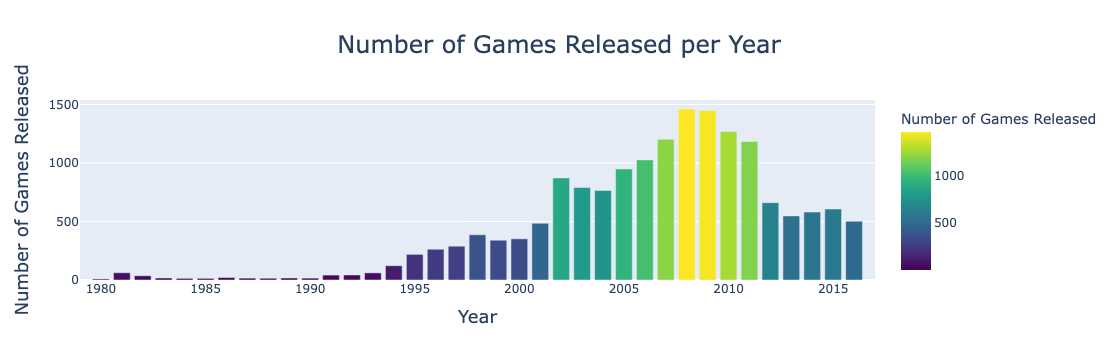

In [810]:
# Create a bar chart using Plotly Express
fig = px.bar(
    release_by_year, 
    x='year', 
    y='num_games', 
    title='Number of Games Released per Year', 
    labels={'year': 'Year', 'num_games': 'Number of Games Released'},
    color='num_games', 
    color_continuous_scale='viridis'
)

# Update the layout to customize titles and their fonts
fig.update_layout(
    title={
        'text': 'Number of Games Released per Year',
        'y':0.9,  # Adjusts the title vertical alignment; 0.9 is near the top
        'x':0.5,  # Centers the title
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24}  # Title font size
    },
    xaxis={
        'title': {
            'text': 'Year',
            'font': {'size': 18}  # X-axis title font size
        }
    },
    yaxis={
        'title': {
            'text': 'Number of Games Released',
            'font': {'size': 18}  # Y-axis title font size
        }
    }
)

# Update the x-axis range to go from 1979 to 2017
fig.update_xaxes(range=[1979, 2017])

# Show the plot
fig.show()

#### 2006-2011 had a high amount of games released, with 2008 and 2009 at a tie for the highest years.

### The market seemed to stabilize in the year 2012.

## <span style="color: coral;">Calculate the total sales ( the sum of each of the 4 regions ), for each game.</span>

In [814]:
# Calculate the total sales for each game by summing 'sales_na', 'sales_eu', and 'sales_jp', and 'sales_other'
games['total_sales'] = games['sales_na'] + games['sales_eu'] + games['sales_jp'] + games['sales_other']

# Display the DataFrame to verify the new column
print("DataFrame with total sales calculated for each game, for all 4 regions:")
games_sorted = games.sort_values(by='total_sales', ascending=False)
display(games_sorted.head(20))

DataFrame with total sales calculated for each game, for all 4 regions:


name platform  year         genre  \
0                                     Wii Sports      Wii  2006        Sports   
1                              Super Mario Bros.      NES  1985      Platform   
2                                 Mario Kart Wii      Wii  2008        Racing   
3                              Wii Sports Resort      Wii  2009        Sports   
4                       Pokemon Red/Pokemon Blue       GB  1996  Role-Playing   
5                                         Tetris       GB  1989        Puzzle   
6                          New Super Mario Bros.       DS  2006      Platform   
7                                       Wii Play      Wii  2006          Misc   
8                      New Super Mario Bros. Wii      Wii  2009      Platform   
9                                      Duck Hunt      NES  1984       Shooter   
10                                    Nintendogs       DS  2005    Simulation   
11                                 Mario Kart DS       DS  2005        Racing   
12                   Pokemon Gold/Pokemon Silver       GB  1999  Role-Playing   
13                                       Wii Fit      Wii  2007        Sports   
14                            Kinect Adventures!     X360  2010          Misc   
15                                  Wii Fit Plus      Wii  2009        Sports   
16                            Grand Theft Auto V      PS3  2013        Action   
17                 Grand Theft Auto: San Andreas      PS2  2004        Action   
18                             Super Mario World     SNES  1990      Platform   
19  Brain Age: Train Your Brain in Minutes a Day       DS  2005          Misc   

    sales_na  sales_eu  sales_jp  sales_other  critic_score  user_score  \
0      41.36     28.96      3.77         8.45            76         8.0   
1      29.08      3.58      6.81         0.77             0         0.0   
2      15.68     12.76      3.79         3.29            82         8.3   
3      15.61     10.93      3.28         2.95            80         8.0   
4      11.27      8.89     10.22         1.00             0         0.0   
5      23.20      2.26      4.22         0.58             0         0.0   
6      11.28      9.14      6.50         2.88            89         8.5   
7      13.96      9.18      2.93         2.84            58         6.6   
8      14.44      6.94      4.70         2.24            87         8.4   
9      26.93      0.63      0.28         0.47             0         0.0   
10      9.05     10.95      1.93         2.74             0         0.0   
11      9.71      7.47      4.13         1.90            91         8.6   
12      9.00      6.18      7.20         0.71             0         0.0   
13      8.92      8.03      3.60         2.15            80         7.7   
14     15.00      4.89      0.24         1.69            61         6.3   
15      9.01      8.49      2.53         1.77            80         7.4   
16      7.02      9.09      0.98         3.96            97         8.2   
17      9.43      0.40      0.41        10.57            95         9.0   
18     12.78      3.75      3.54         0.55             0         0.0   
19      4.74      9.20      4.16         2.04            77         7.9   

   rating  total_sales  
0    None        82.54  
1    None        40.24  
2    None        35.52  
3    None        32.77  
4    None        31.38  
5    None        30.26  
6    None        29.80  
7    None        28.91  
8    None        28.32  
9    None        28.31  
10   None        24.67  
11   None        23.21  
12   None        23.09  
13   None        22.70  
14   None        21.82  
15   None        21.80  
16   None        21.05  
17   None        20.81  
18   None        20.62  
19   None        20.14

#### Wii Sports game had the highest sales 

## <span style="color: coral;">Total Sales, by Gaming Platform.</span>

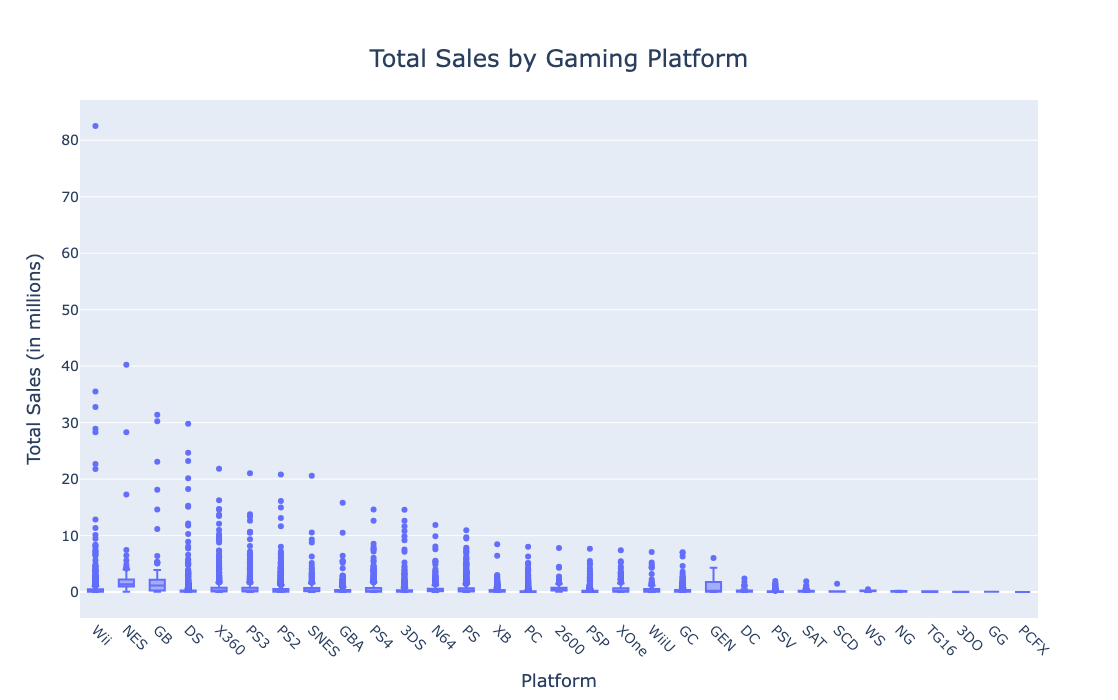

In [817]:
# Create box plot using Plotly to create sales 
fig = px.box(games, x='platform', y='total_sales', title='Total Sales by Gaming Platform',
             labels={'total_sales': 'Total Sales', 'platform': 'Platform'})

# Update layout for larger font sizes and graph size
fig.update_layout(
    title={
        'text': 'Total Sales by Gaming Platform',
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {
            'size': 24  # Increase title font size
        }
    },
    xaxis_title={
        'text': 'Platform',
        'font': {
            'size': 18  # Increase x-axis title font size
        }
    },
    yaxis_title={
        'text': 'Total Sales (in millions)',
        'font': {
            'size': 18  # Increase y-axis title font size
        }
    },
    font=dict(
        size=14  # Increase font size for all other text (tick labels, legend, etc.)
    ),
    xaxis=dict(
        tickangle=45  # Rotate x-axis labels by 45 degrees
    ),
    autosize=False,
    width=1000,  # Set the width of the entire figure
    height=700  # Set the height of the entire figure
)

# Display the plot
fig.show()

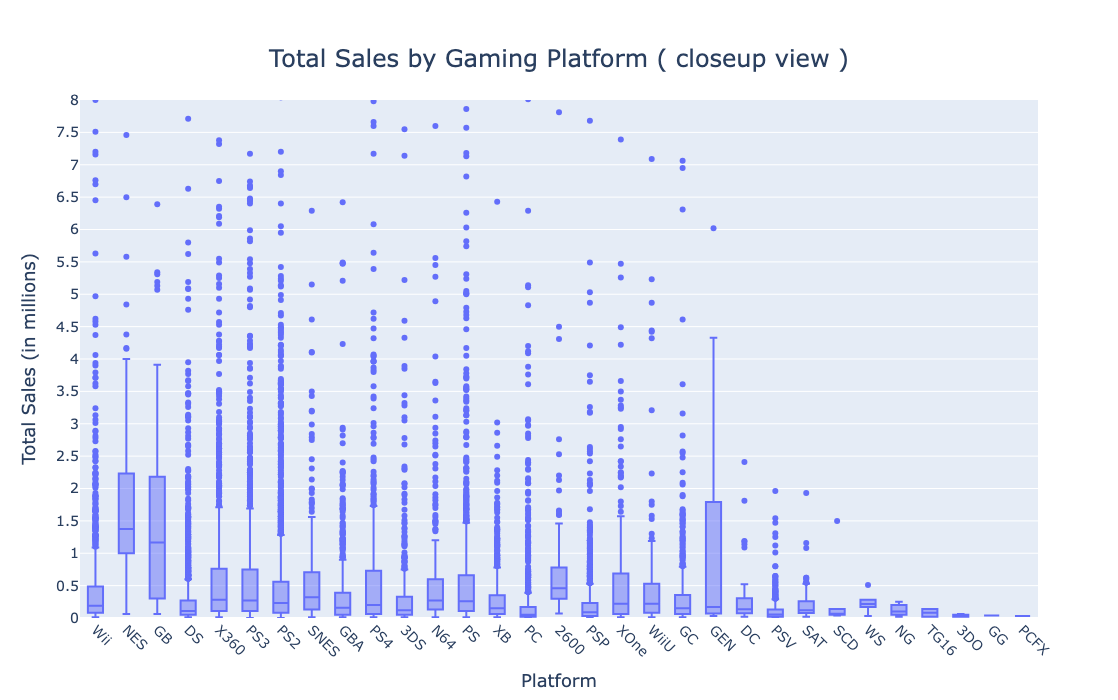

In [818]:
# Update layout for larger font sizes and graph size
fig.update_layout(
    title={
        'text': 'Total Sales by Gaming Platform ( closeup view )',
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {
            'size': 24  # Increase title font size
        }
    },
    xaxis_title={
        'text': 'Platform',
        'font': {
            'size': 18  # Increase x-axis title font size
        }
    },
    yaxis_title={
        'text': 'Total Sales (in millions)',
        'font': {
            'size': 18  # Increase y-axis title font size
        }
    },
    font=dict(
        size=14  # Increase font size for all other text (tick labels, legend, etc.)
    ),
    xaxis=dict(
        tickangle=45,  # Rotate x-axis labels by 45 degrees
        range=[-0.5, len(games['platform'].unique()) - 0.5]  # Control x-axis ticks to show only relevant platforms
    ),
    yaxis=dict(
        range=[0, 8],  # Y-axis range from 0 to 8
        tick0=0,
        dtick=.5  # Interval of .5 unit between ticks
    ),
    autosize=False,
    width=1000,  # Set the width of the entire figure
    height=700  # Set the height of the entire figure
)
# Display the plot
fig.show()

In [819]:
# Aggregate total sales by platform
# Group the data by 'platform' and sum the 'total_sales' for each platform
platform_sales = games.groupby('platform')['total_sales'].sum().reset_index()

# Sort by 'total_sales' in descending order
platform_sales = platform_sales.sort_values(by='total_sales', ascending=False)

In [820]:
# Ensure 'platform' columns are of type string before merging
platform_sales['platform'] = platform_sales['platform'].astype(str)
platform_years_df['platform'] = platform_years_df['platform'].astype(str)

# Merge with platform release years
platform_sales_with_years = platform_sales.merge(platform_years_df, on='platform', how='left')

# Display the total sales by platform
print(platform_sales_with_years)

   platform  total_sales  release_year
0       PS2      1255.77          2000
1      X360       971.42          2005
2       PS3       939.64          2006
3       Wii       907.51          2006
4        DS       806.12          2005
5        PS       730.86          1994
6       GBA       317.85          2001
7       PS4       314.14          2013
8       PSP       294.05          2004
9        PC       259.52          1967
10      3DS       259.00          2010
11       XB       257.74          2001
12       GB       255.46          1989
13      NES       251.05          1983
14      N64       218.68          1996
15     SNES       200.04          1991
16       GC       198.93          2000
17     XOne       159.32          2013
18     2600        96.98          1977
19     WiiU        82.19          2012
20      PSV        54.07          2012
21      SAT        33.59          1994
22      GEN        30.74          2002
23       DC        15.95          2011
24      SCD         1.86 

#### PS2 had the highest total sales, with X360, Wii, and PS3 not far behind.

## <span style="color: coral;">Take a look at sales just for the "PS2" gaming platform.</span>

In [823]:
ps2_games = games[games['platform'] == 'PS2']

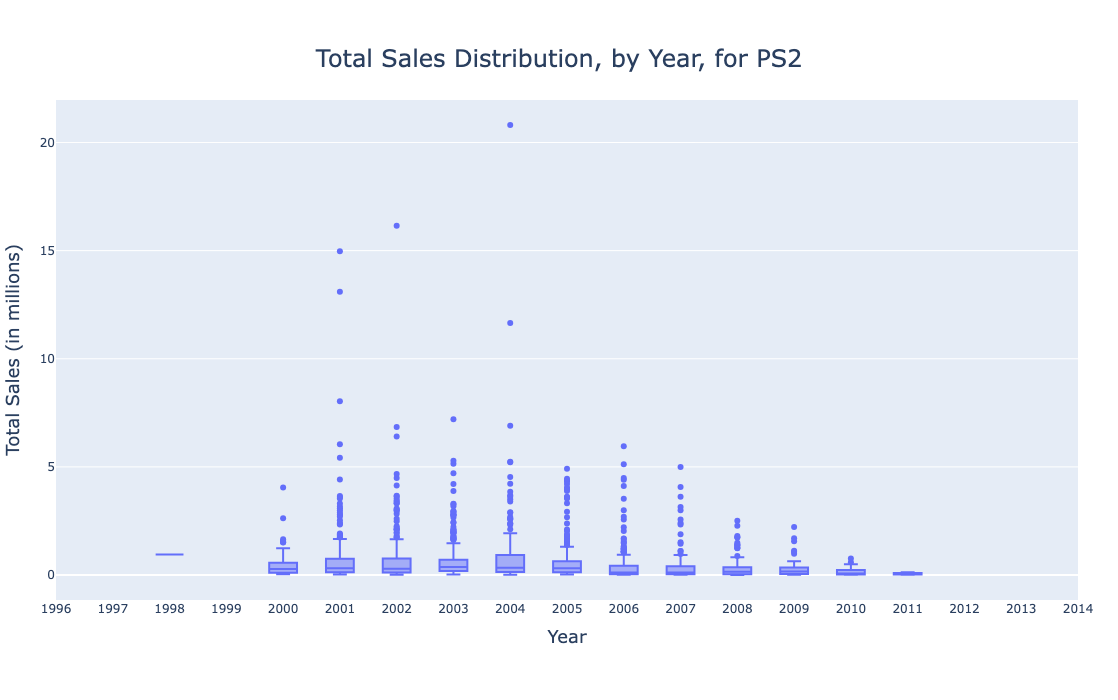

In [824]:
fig = px.box(
    ps2_games,
    x='year',
    y='total_sales',
    title='Total Sales Distribution by Year for PS2',
    labels={'total_sales': 'Total Sales', 'year': 'Year'}
)

# Update layout for larger font sizes, graph size, and custom x-axis range
fig.update_layout(
    title={
        'text': 'Total Sales Distribution, by Year, for PS2',
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {
            'size': 24  # Increase title font size
        }
    },
    xaxis_title={
        'text': 'Year',
        'font': {
            'size': 18  # Increase x-axis title font size
        }
    },
    yaxis_title={
        'text': 'Total Sales (in millions)',
        'font': {
            'size': 18  # Increase y-axis title font size
        }
    },
    xaxis=dict(
        tickangle=0,  # Normal orientation
        range=[1996, 2014],  # Custom range for x-axis
        dtick=1,  # Set tick interval to 1 for each year
        tickmode='linear'  # Ensure ticks are at each year mark 
    ),
    autosize=False,
    width=1110,  # Increase the width of the entire figure
    height=700,  # Keep the height of the entire figure
    margin=dict(
        l=40,   # Adjust left margin
        r=40,   # Adjust right margin
        b=100,  # Adjust bottom margin
        t=100   # Adjust top margin
    )
)

fig.show()

#### 2001-2004 were the highest sales years for PS2.

In [826]:
ps2_games.value_counts()
# Count occurrences of each unique row
count_series = ps2_games.value_counts().reset_index(name='counts')
# Sort by the 'year' column

sorted_df = count_series.sort_values(by='year')

# Display the sorted DataFrame
display(sorted_df.tail(20))

name platform  year  \
860   Strike Witches: Anata to Dekiru Koto - A Littl...      PS2  2010   
462         Pachi-Slot Higrashi no Naku Koro ni Matsuri      PS2  2010   
702   World Soccer Winning Eleven 2010: Aoki Samurai...      PS2  2010   
1869                         Major League Baseball 2K10      PS2  2010   
1239                                     FIFA Soccer 11      PS2  2010   
218                                    S.Y.K Renshouden      PS2  2010   
2122  Hana to Otome ni Shukufuku o: Harekaze no Okur...      PS2  2010   
1539    Clover no Kuni no Alice: Wonderful Wonder World      PS2  2010   
1636                                  Kiniro no Corda 3      PS2  2010   
2125                               Hakuouki: Reimeiroku      PS2  2010   
712                           pro evolution soccer 2011      PS2  2010   
321                                    NCAA Football 11      PS2  2010   
713                       ef - a fairy tale of the two.      PS2  2010   
1848                                   MLB 11: The Show      PS2  2011   
71                            Pro Evolution Soccer 2012      PS2  2011   
1868                         Major League Baseball 2K11      PS2  2011   
391                Moujuutsukai to Oujisama: Snow Bride      PS2  2011   
245                 Sangoku Koi Senki: Otome no Heihou!      PS2  2011   
774                                       WWE All Stars      PS2  2011   
1246                                            FIFA 12      PS2  2011   

          genre  sales_na  sales_eu  sales_jp  sales_other  critic_score  \
860      Action      0.00      0.00      0.02         0.00             0   
462        Misc      0.00      0.00      0.02         0.00             0   
702      Sports      0.00      0.00      0.09         0.00             0   
1869     Sports      0.11      0.09      0.00         0.03            53   
1239     Sports      0.11      0.29      0.00         0.36            73   
218   Adventure      0.00      0.00      0.03         0.00             0   
2122  Adventure      0.00      0.00      0.02         0.00             0   
1539  Adventure      0.00      0.00      0.02         0.00             0   
1636  Adventure      0.00      0.00      0.03         0.00             0   
2125  Adventure      0.00      0.00      0.05         0.00             0   
712      Sports      0.04      0.21      0.05         0.11            79   
321      Sports      0.19      0.15      0.00         0.05            85   
713   Adventure      0.00      0.00      0.01         0.00             0   
1848     Sports      0.06      0.05      0.00         0.02            77   
71       Action      0.00      0.00      0.06         0.00            77   
1868     Sports      0.02      0.02      0.00         0.01            74   
391   Adventure      0.00      0.00      0.02         0.00             0   
245   Adventure      0.00      0.00      0.01         0.00             0   
774    Fighting      0.05      0.04      0.00         0.01            70   
1246     Sports      0.00      0.02      0.00         0.06             0   

      user_score rating  total_sales  counts  
860          0.0   None         0.02       1  
462          0.0   None         0.02       1  
702          0.0   None         0.09       1  
1869         0.0   None         0.23       1  
1239         6.6   None         0.76       1  
218          0.0   None         0.03       1  
2122         0.0   None         0.02       1  
1539         0.0   None         0.02       1  
1636         0.0   None         0.03       1  
2125         0.0   None         0.05       1  
712          6.7   None         0.41       1  
321          0.0   None         0.39       1  
713          0.0   None         0.01       1  
1848         6.2   None         0.13       1  
71           8.2   None         0.06       1  
1868         0.0   None         0.05       1  
391          0.0   None         0.02       1  
245          0.0   None         0.01       1  
774   

## <span style="color: coral;">Display distribution of platform sales over years.</span>

In [828]:
platform_sales = games.groupby(['platform', 'year'])['total_sales'].sum().reset_index()

platform_sales_sorted = platform_sales.sort_values(by=['year', 'total_sales'], ascending=[True, False])

print("Platform Sales by Year:")
print(platform_sales_sorted)

Platform Sales by Year:
    platform  year  total_sales
0       2600  1980        11.38
1       2600  1981        43.65
2       2600  1982        28.88
81       NES  1983        10.96
3       2600  1983         5.84
..       ...   ...          ...
219     WiiU  2016         4.60
181      PSV  2016         4.25
159      PS3  2016         3.60
231     X360  2016         1.52
214      Wii  2016         0.18

[245 rows x 3 columns]


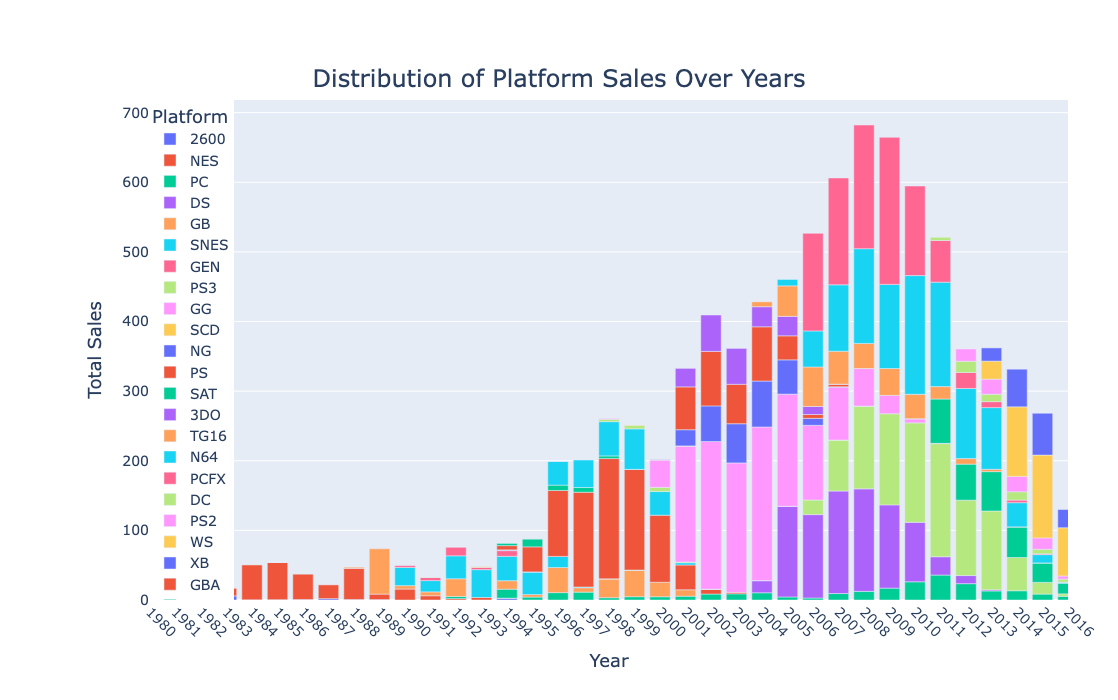

In [829]:
fig = px.bar(platform_sales_sorted, 
              x='year', 
              y='total_sales', 
              color='platform', 
              title='Platform Sales by Year',
              labels={'year': 'Year', 'total_sales': 'Total Sales', 'platform': 'Platform'})

# Customize layout
fig.update_layout(
    title={
        'text': 'Distribution of Platform Sales Over Years',
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24}
    },
    xaxis=dict(
        title='Year',
        tickvals=list(range(1979, 2018)),  # Custom tick values from 1979 to 2017
        tickmode='array',
        range=[1980, 2016],  # Set the range for x-axis from 1980 to 2016
        tickangle=45,  # Rotate x-axis labels to 45 degrees
        title_font={'size': 18}
    ),
    yaxis=dict(
        title='Total Sales',
        title_font={'size': 18}
    ),
    font=dict(size=14),
    width=1140,  # Increase the width of the entire figure
    height=700,  # Keep the height of the entire figure
    margin=dict(
        l=150,  # Increase the left margin to accommodate the legend
        r=50,   # Adjust the right margin as needed
        b=100,  # Increase the bottom margin to accommodate rotated labels
        t=100   # Top margin
    ),
    legend_title={
        'text': 'Platform',
        'font': {'size': 18}
    },
    legend=dict(
        x=0,  # Position the legend to the left
        xanchor='left',  # Anchor the legend to the left
        font=dict(size=14)
    )
)
# Show the plot
fig.show()

In [830]:
# Filter for GBA platform and the year 1999
gba_sales_1999 = platform_sales[(platform_sales['platform'] == 'GBA') & (platform_sales['year'] == 1999)]
print("GBA for year 1999")
print(gba_sales_1999)

# Filter for GBA platform and the year 2006
gba_sales_2006 = platform_sales[(platform_sales['platform'] == 'GBA') & (platform_sales['year'] == 2006)]
print("\n")
print("GBA for year 2006")
print(gba_sales_2006)

# Filter for GBA platform and the year 2007
gba_sales_2007 = platform_sales[(platform_sales['platform'] == 'GBA') & (platform_sales['year'] == 2007)]
print("\n")
print("GBA for year 2007")
print(gba_sales_2007)

# Filter for GBA platform and the year 2008
gba_sales_2008 = platform_sales[(platform_sales['platform'] == 'GBA') & (platform_sales['year'] == 2008)]
print("\n")
print("GBA for year 2008")
print(gba_sales_2008)

GBA for year 1999
Empty DataFrame
Columns: [platform, year, total_sales]
Index: []


GBA for year 2006
   platform  year  total_sales
58      GBA  2006         5.46


GBA for year 2007
   platform  year  total_sales
59      GBA  2007          3.4


GBA for year 2008
Empty DataFrame
Columns: [platform, year, total_sales]
Index: []


#### GBA had no sales in the year 1999, and no sales in the year 2008.

## <span style="color: coral;">Compare a few of the platforms that had high sales.</span>

In [833]:
selected_platforms = ['X360', 'XOne', 'PS3', 'PS4', 'WiiU', '3DS']
filtered_games = games[games['platform'].isin(selected_platforms)]

In [834]:
# Reviewer's code 5

list(games.groupby(['platform'])['total_sales'].sum().sort_values().tail(7).index)

['GBA', 'PS', 'DS', 'Wii', 'PS3', 'X360', 'PS2']

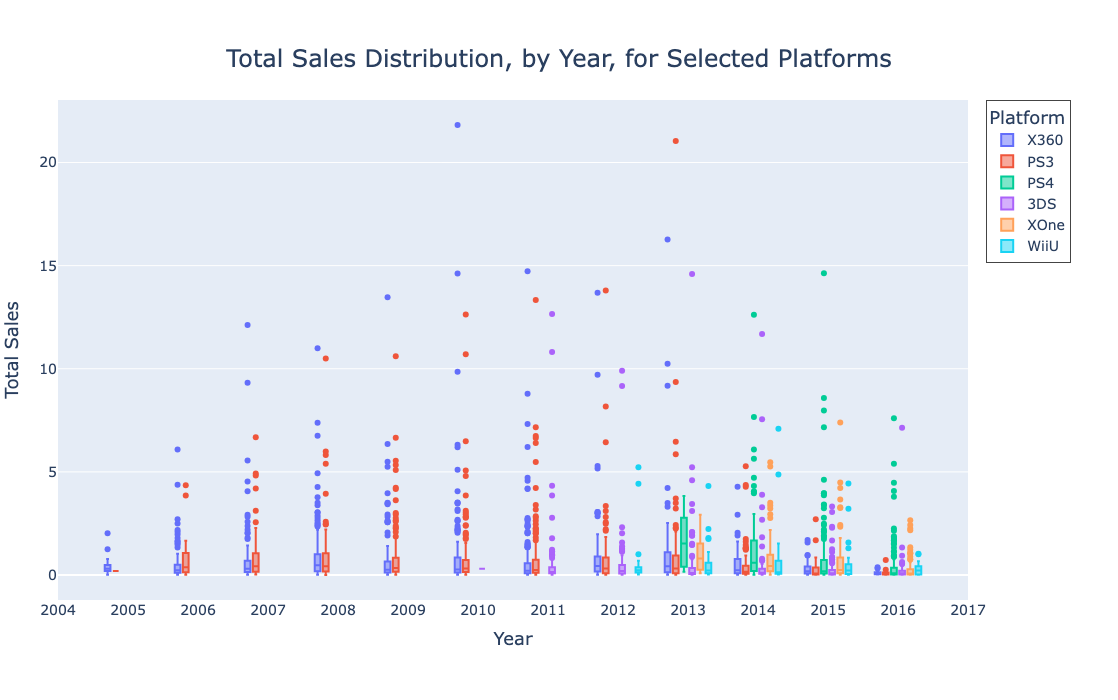

In [835]:
tick_vals = list(range(1998, 2019))

# Create a box plot showing distribution of total sales by year for selected platforms
fig = px.box(
    filtered_games,
    x='year',
    y='total_sales',
    color='platform',
    title='Total Sales Distribution by Year for Selected Platforms',
    labels={'total_sales': 'Total Sales', 'year': 'Year'}
)
# Update layout for larger font sizes, graph size, custom x-axis range and ticks
fig.update_layout(
    title={
        'text': 'Total Sales Distribution, by Year, for Selected Platforms',
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {
            'size': 24  # Increase title font size
        }
    },
    xaxis_title={
        'text': 'Year',
        'font': {
            'size': 18  # Increase x-axis title font size
        }
    },
    yaxis_title={
        'text': 'Total Sales',
        'font': {
            'size': 18  # Increase y-axis title font size
        }
    },
    font=dict(
        size=14  # Increase font size for all other text (tick labels, legend, etc.)
    ),
    xaxis=dict(
        tickangle=0,  # Normal orientation
        tickvals=tick_vals,  # Set specific tick values from 1998 to 2018
        tickmode='array',  # Ensure custom tick values are used
        range=[2004, 2017]  # Set the range for x-axis from 1998 to 2018
    ),
    autosize=False,
    width=1140,  # Increase the width of the entire figure
    height=700,  # Keep the height of the entire figure
    margin=dict(
        l=50,   # Adjust left margin
        r=150,  # Increase right margin to avoid cutting off right x-tick
        b=100,  # Adjust bottom margin
        t=100   # Adjust top margin
    ),
    legend_title={
        'text': 'Platform',
        'font': {'size': 18}  # Increase font size for legend title
    },
    legend=dict(
        font=dict(size=14),  # Increase font size for legend items
        borderwidth=1  # Add a border to the legend
    )
)


#Adjust Margins:

margin=dict(
    l=50,   # Left margin
    r=150,  # Increase right margin to avoid cutting off right x-tick
    b=100,  # Bottom margin
    t=100   # Top margin
)

fig.show()

#### Year span of platforms:
- XOne 2013-2016 , 4 years
- WiiU 2012-2016 , 5 years
- X360 2005-2016 , 12 years
- PS3 2006-2016 , 11 years
- 3DS 2010-2016 , 7 years
- PS4 2013-2016, 4 years

### Keep in mind that this data set only goes to the year 2016, so, although these games, show their last year as 2016, we actually do not know their last year yet,  as the dataset does not have data for the year 2017.

## <span style="color: coral;">What is the average lifespan of a gaming platform?.</span>

#### An average lifespan of a gaming platform is 10 years.

## <span style="color: coral;">What platforms used to be popular, but now have zero sales?</span>

#### PS2 and DS used to be popular, and now have zero sales. 
- PS2 ran for 12 years, with a span from 2000-2011.
- PS2 had a total of 1.25 billion in sales
<br>
<br>
- DS ran for 10 years, with a span from 2004-2013.
- DS had a total of 800 million in sales        

#### GB and GBA used to have high sales, now have zero sales.

- GBA ran for 7 years, with a span from 2001-2007.
- GB ran for 14 years, with a span from 1988-2001

## <span style="color: coral;">Total Sales, by Genre, Over Years</span>

In [842]:
# Aggregate sales by year and genre
sales_by_year_genre = games.groupby(['year', 'genre'])['total_sales'].sum().reset_index()

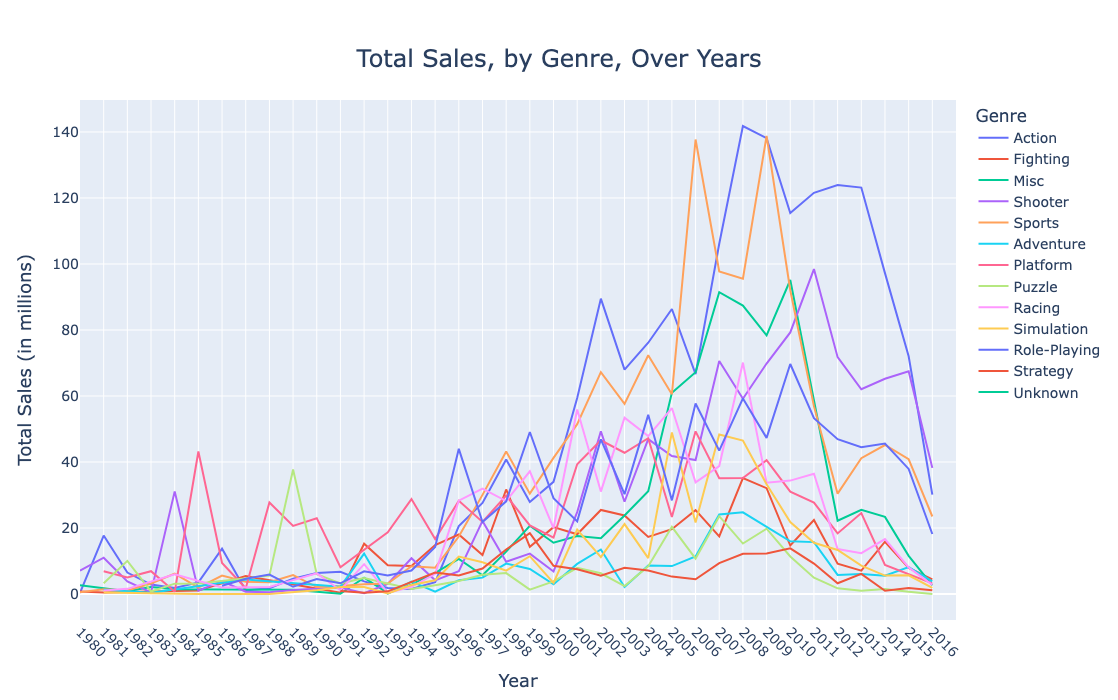

In [843]:
fig = px.line(sales_by_year_genre, x='year', y='total_sales', color='genre',
title='Total Sales by Genre Over the Years',
labels={'total_sales': 'Total Sales', 'year': 'Year', 'genre': 'Genre'},
category_orders={'year': list(range(1980, 2017))}) # Ensure all years are covered

#Update layout for larger font sizes and graph size
fig.update_layout(
title={
'text': 'Total Sales, by Genre, Over Years',
'x': 0.5,
'xanchor': 'center',
'yanchor': 'top',
'font': {
'size': 24 # Increase title font size
}
},
xaxis_title={
'text': 'Year',
'font': {
'size': 18 # Increase x-axis title font size
}
},
yaxis_title={
'text': 'Total Sales (in millions)',
'font': {
'size': 18 # Increase y-axis title font size
}
},
font=dict(
size=14 # Increase font size for all other text (tick labels, legend, etc.)
),
xaxis=dict(
range=[1980, 2017], # Set the x-axis range to include 1980 to 2017
tickmode='array', # Use an explicit list of ticks
tickvals=list(range(1980, 2017)), # List of tick values from 1980 to 2017
tickangle=45 # Rotate x-axis labels by 45 degrees
),
autosize=False,
width=1000, # Set the width of the entire figure
height=700 # Set the height of the entire figure
)

fig.show() # Aggregate sales by year and genre
sales_by_year_genre = games.groupby(['year', 'genre'])['total_sales'].sum().reset_index() 

#### Action and Shooter genres are going strong in 2015-2016, with a downward decline in 2016. No genres are making an upward climb in 2016, so I don't think that you can conclude that other genres are going to do better than Action and Shooter in 2017. 

## <span style="color: coral;">Global sales of all games, by platform.</span>

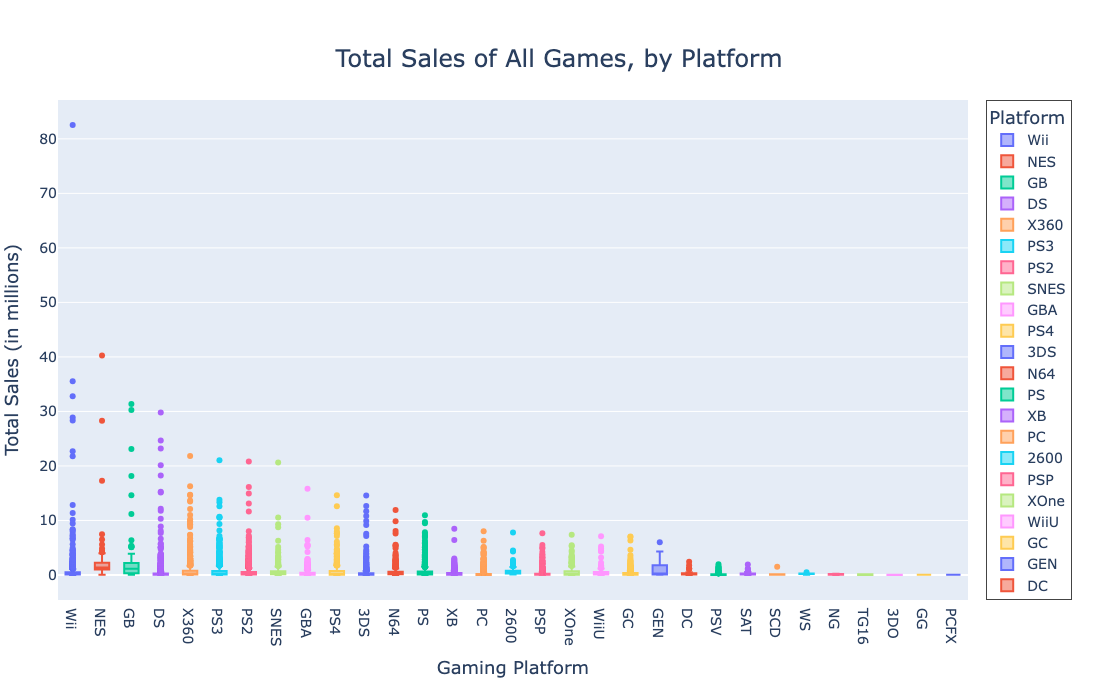

In [846]:
# Create a box plot showing the distribution of total sales by platform
fig = px.box(
    games,
    x='platform',
    y='total_sales',
    color='platform',
    title='Total Sales of All Games, by Platform',
    labels={'total_sales': 'Total Sales', 'platform': 'Platform'}
)
# Update layout for larger font sizes, graph size
fig.update_layout(
    title={
        'text': 'Total Sales of All Games, by Platform',
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {
            'size': 24  # Increase title font size
        }
    },
    xaxis_title={
        'text': 'Gaming Platform',
        'font': {
            'size': 18  # Increase x-axis title font size
        }
    },
    yaxis_title={
        'text': 'Total Sales (in millions)',
        'font': {
            'size': 18  # Increase y-axis title font size
        }
    },
    font=dict(
        size=14  # Increase font size for all other text (tick labels, legend, etc.)
    ),
    autosize=False,
    width=1140,  # Increase the width of the entire figure
    height=700,  # Keep the height of the entire figure
    margin=dict(
        l=50,   # Adjust left margin
        r=150,  # Increase right margin to avoid cutting off right x-tick
        b=100,  # Adjust bottom margin
        t=100   # Adjust top margin
    ),
    legend_title={
        'text': 'Platform',
        'font': {'size': 18}  # Increase font size for legend title
    },
    legend=dict(
        font=dict(size=14),  # Increase font size for legend items
        borderwidth=1  # Add a border to the legend
    )
)

#### There are so many outliers in many of the games. This is hard to read. Let's take a closer look at a few of the top platformas.

## <span style="color: coral;">Yearly sales of top platforms.</span>

In [849]:
# Select top platforms
filtered_games_platforms = games[games['platform'].isin(selected_platforms)]

In [850]:
# Aggregate data to get the total sales per year for each platform
aggregated_data = filtered_games_platforms.groupby(['year', 'platform'])['total_sales'].sum().reset_index()

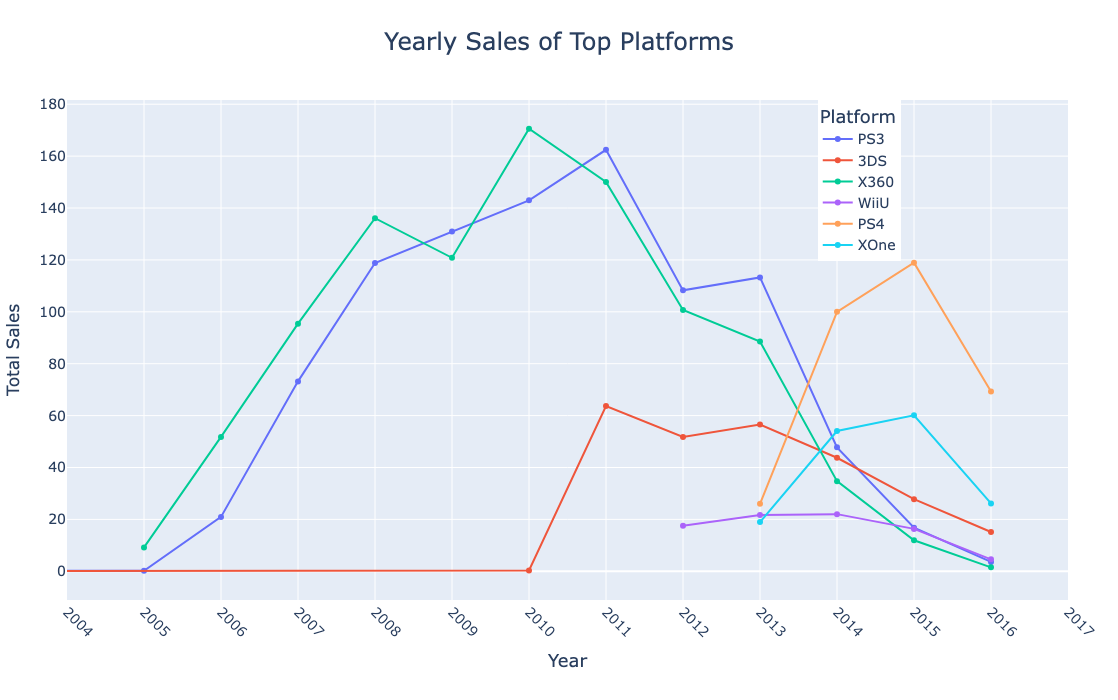

In [851]:
# Create the line plot using Plotly
fig = px.line(
    aggregated_data,
    x='year',
    y='total_sales',
    color='platform',
    markers=True,
    title='Yearly Sales of Top Platforms',
    labels={'total_sales': 'Total Sales', 'year': 'Year'}
)

# Customize layout
fig.update_layout(
    title={
        'text': 'Yearly Sales of Top Platforms',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 24}
    },
    xaxis=dict(
        title='Year',
        tickmode='linear',
        tick0=2000,
        dtick=1,
        title_font={'size': 18},
        tickangle=45,  # Rotate x-axis labels to 45 degrees
        range=[2004, 2017]  # Set range from 2000 to 2016
    ),
       font=dict(size=14),
    width=1140,
    height=700,
    margin=dict(
        l=50,  # Left margin
        r=50,  # Right margin
        b=100,  # Bottom margin to accommodate rotated labels
        t=100  # Top margin
    ),
    legend=dict(
        title='Platform',
        title_font=dict(size=18),
        font=dict(size=14),
        x=0.75,  # Adjust x position to move the legend to the left
        y=1.0,   # Adjust y position as needed
        xanchor='left',
        yanchor='top'
    )
)

# Show the plot
fig.show()

#### 3DS had high sales, but died off in 2011. PS4 is going strong in 2016.

## <span style="color: coral;">Build a model for 2017.</span>

### Based off of analysis of data leading up to 2016, I will estimate which platform will have the most sales in 2017.

## <span style="color: coral;">Analyze sales distribution. Identify most promising platforms.</span>

#### By clicking on and off buttons on the graph, to only display some of the platforms, it looks like these are the most promising platforms around the 2012-2016 years: 3DS, PS4, PS3, PC, WiiU, XOne.  But, it looks like PS4 was doing the strongest in the years 2015-2016. 

In [857]:
# Reviewer's code

games.query('year>2011').pivot_table(index='year', columns='platform', values='total_sales', aggfunc='sum')


platform    3DS     DS     PC     PS3     PS4   PSP    PSV    Wii   WiiU  \
year                                                                       
2012      51.76  11.67  23.45  108.27     NaN  7.95  16.19  22.94  17.56   
2013      56.57   1.54  13.01  113.25   25.99  3.38  10.59   8.59  21.65   
2014      43.76    NaN  13.28   47.76  100.00  0.24  11.90   3.75  22.03   
2015      27.78    NaN   8.52   16.82  118.90  0.12   6.51   1.14  16.35   
2016      15.14    NaN   5.25    3.60   69.25   NaN   4.25   0.18   4.60   

platform    X360   XOne  
year                     
2012      100.72    NaN  
2013       88.58  18.96  
2014       34.74  54.07  
2015       11.96  60.14  
2016        1.52  26.15

## <span style="color: coral;">Which platforms have the most growth potential?</span>

### PS4 and 3DS.

#### PS4 has high sales for 2016. So, it should continue to have high sales for 2017. 

#### So far, PS4 has been around 4 years, between 2013-2016. Previous charts showed that the average lifespan of a gaming platform is 9-10 years. So, considering that PS4 is the most successful platform so far, it is safe to assume that it will span 10 years. So, PS4 should have high sales for 6 more years, going in to the year 2023.

In [862]:
# Filtering data to only include the platforms PS4 and 3DS, and the years 2012 to 2016
filtered_games = games[(games['platform'].isin(['PS4', 'XOne'])) & (games['year'] >= 2012) & (games['year'] <= 2016)]

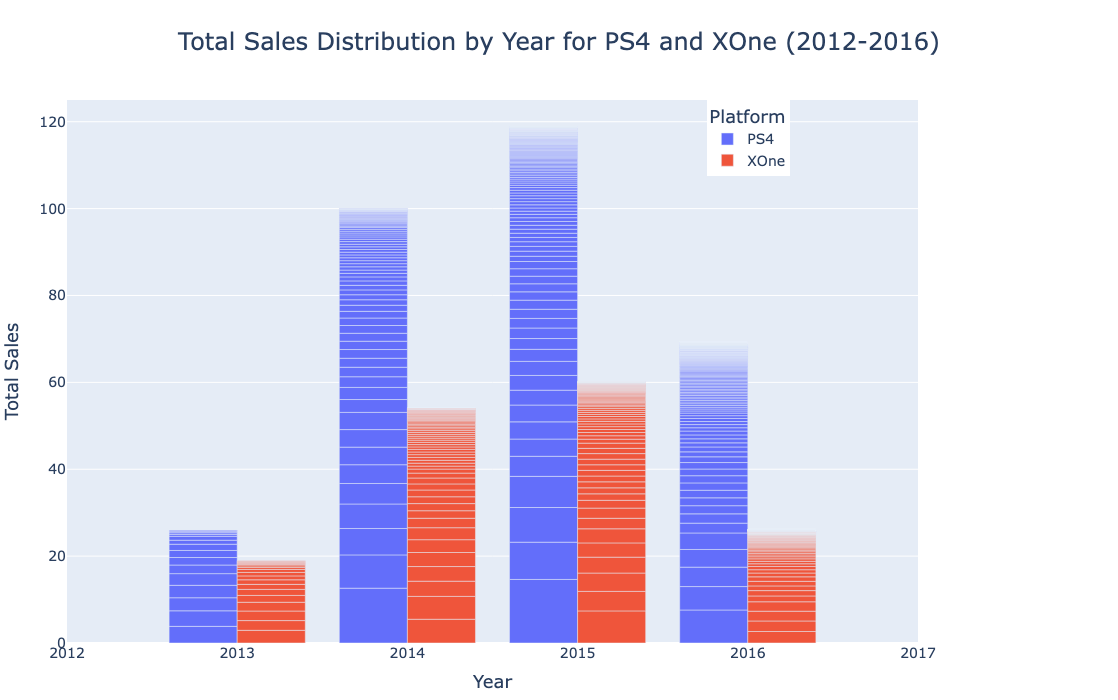

In [863]:
# Create a bar chart using Plotly Express
fig = px.bar(
    filtered_games,
    x='year',
    y='total_sales',
    color='platform',
    barmode='group',
    title='Total Sales Distribution by Year for PS4 and XOne (2012-2016)',
    labels={'total_sales': 'Total Sales', 'year': 'Year'}
)

# Customize layout
fig.update_layout(
    title={
        'text': 'Total Sales Distribution by Year for PS4 and XOne (2012-2016)',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 24}  # Increase title font size
    },
    xaxis=dict(
        title='Year',
        tickvals=[2012, 2013, 2014, 2015, 2016, 2017],  # Custom tick values from 2012 to 2017
        tickmode='array',  # Ensure custom tick values are used
        range=[2012, 2017],  # Set the range for x-axis from 2012 to 2017
        title_font={'size': 18}  # Increase x-axis title font size
    ),
    yaxis=dict(
        title='Total Sales',
        range=[0, 125],  # Set the range for y-axis
        title_font={'size': 18}  # Increase y-axis title font size
    ),
    font=dict(size=14),  # Increase font size for all other text (tick labels, legend, etc.)
    width=1200,  # Increase the width of the entire figure
    height=700,  # Keep the height of the entire figure
    margin=dict(
        l=50,   # Left margin
        r=200,   # Increase right margin to provide more space for the legend
        b=50,   # Bottom margin
        t=100   # Top margin
    ),
    legend_title={
        'text': 'Platform',
        'font': {'size': 18}  # Increase font size for legend title
    },
    legend=dict(
        font=dict(size=14),  # Increase font size for legend items
        x=0.85,  # Adjust x position to move the legend to the left
        y=1,  # Adjust y position of the legend
        xanchor='right',  # Anchors legend to the right at position x
        yanchor='top'  # Anchors legend to the top at position y
    )
)

# Show the plot
fig.show()

## <span style="color: coral;">Using Correlation Coefficients, compare the popular gaming platform "PS3" sales, based on 'critic_score'.</span>

### Only include 'critic_score' greater than 0.

In [866]:
# Filter data for PS3 and `critic_score` > 0
filtered_ps3 = games[
    (games['platform'] == 'PS3') & 
    (games['critic_score'] > 0) & 
    (games['year'] >= 2012) & 
    (games['year'] <= 2016)
]

In [867]:
# Calculate correlation coefficients
corr_na = filtered_ps3['critic_score'].corr(filtered_ps3['sales_na'])
corr_eu = filtered_ps3['critic_score'].corr(filtered_ps3['sales_eu'])
corr_jp = filtered_ps3['critic_score'].corr(filtered_ps3['sales_jp'])

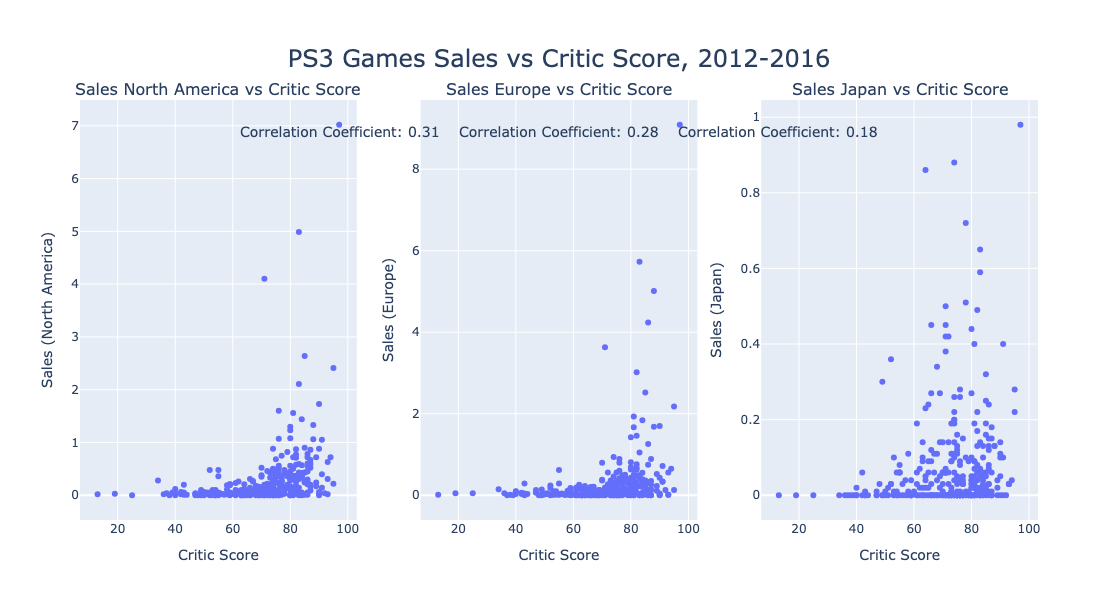

In [868]:
# Create individual scatter plots using Plotly Express
# NORTH AMERICA
fig_na = px.scatter(
    filtered_ps3, x='critic_score', y='sales_na',
    title='Sales North America vs Critic Score',
    labels={'sales_na': 'Sales (North America)', 'critic_score': 'Critic Score'}
)
# EUROPE
fig_eu = px.scatter(
    filtered_ps3, x='critic_score', y='sales_eu',
    title='Sales Europe vs Critic Score',
    labels={'sales_eu': 'Sales (Europe)', 'critic_score': 'Critic Score'}
)
# JAPAN
fig_jp = px.scatter(
    filtered_ps3, x='critic_score', y='sales_jp',
    title='Sales Japan vs Critic Score',
    labels={'sales_jp': 'Sales (Japan)', 'critic_score': 'Critic Score'}
)
# Create subplots
fig = make_subplots(
    rows=1, cols=3, subplot_titles=(
        "Sales North America vs Critic Score",
        "Sales Europe vs Critic Score",
        "Sales Japan vs Critic Score"
    )
)
# Add scatter plots to subplots
for trace in fig_na.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig_eu.data:
    fig.add_trace(trace, row=1, col=2)
for trace in fig_jp.data:
    fig.add_trace(trace, row=1, col=3)
# Update layout with title and axes labels
fig.update_layout(
    title={
        'text': "PS3 Games Sales vs Critic Score, 2012-2016",
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24}
    },
    autosize=False,
    width=1200,
    height=600
)
fig.update_xaxes(title_text="Critic Score", row=1, col=1, title_font={'size': 14})
fig.update_xaxes(title_text="Critic Score", row=1, col=2, title_font={'size': 14})
fig.update_xaxes(title_text="Critic Score", row=1, col=3, title_font={'size': 14})
fig.update_yaxes(title_text="Sales (North America)", row=1, col=1, title_font={'size': 14})
fig.update_yaxes(title_text="Sales (Europe)", row=1, col=2, title_font={'size': 14})
fig.update_yaxes(title_text="Sales (Japan)", row=1, col=3, title_font={'size': 14})
# Annotate plots with correlation coefficients
fig.add_annotation(
    xref="paper", yref="paper", x=0.165, y=0.95,
    text=f"Correlation Coefficient: {corr_na:.2f}",
    showarrow=False, font=dict(size=14)
)
fig.add_annotation(
    xref="paper", yref="paper", x=0.5, y=0.95,
    text=f"Correlation Coefficient: {corr_eu:.2f}",
    showarrow=False, font=dict(size=14)
)
fig.add_annotation(
    xref="paper", yref="paper", x=0.835, y=0.95,
    text=f"Correlation Coefficient: {corr_jp:.2f}",
    showarrow=False, font=dict(size=14)
)
fig.show()

## Correlation Coefficients for PS3 Game Sales vs Critic Score, 2012-2016
Correlation coefficients range from -1 to +1.
- **r = 1**: Perfect positive correlation (as one variable increases, the other increases perfectly linearly).
- **r = -1**: Perfect negative correlation (as one variable increases, the other decreases perfectly linearly).
- **r = 0**: No linear correlation (there is no linear relationship between the variables).

## Correlation Coefficients are commonly interpreted using the following general guidelines:

### Positive Correlation:
- 0.00 to 0.10: Negligible correlation
- 0.10 to 0.30: Weak correlation
- 0.30 to 0.50: Moderate correlation
- 0.50 to 1.00: Strong correlation

### Negative Correlation:

- 0.10 to 0.00: Negligible negative correlation
- 0.30 to -0.10: Weak negative correlation
- 0.50 to -0.30: Moderate negative correlation
- 1.00 to -0.50: Strong negative correlation


### Interpretation of Correlation Coefficients:
#### North America (0.31)
- **Correlation Coefficient**: 0.31
- **Interpretation**: This suggests a moderate positive correlation. As critic scores increase, there is a moderate tendency for PS3 game sales to increase in North America. This implies that while higher critic scores are associated with higher sales, the relationship is not especially strong, indicating that other factors also influence sales.
#### Europe (0.28)
- **Correlation Coefficient**: 0.28
- **Interpretation**: This indicates a moderate positive correlation. As critic scores increase, there is a moderate tendency for PS3 game sales to increase in Europe. The slightly lower correlation compared to North America suggests a similar but somewhat less pronounced relationship between critic scores and sales.
#### Japan (0.18)
- **Correlation Coefficient**: 0.18
- **Interpretation**: This suggests a weak positive correlation. As critic scores increase, there is a slight tendency for PS3 game sales to increase in Japan. However, the relationship is weaker compared to North America and Europe, indicating that critic scores have a less significant impact on game sales in the Japanese market.
---
### Conclusion
There is a moderate positive correlation between PS3 game sales and critic scores in North America and Europe, indicating that higher critic scores tend to be associated with higher sales in these regions. However, the correlations are not particularly strong, suggesting that other factors also influence sales. In Japan, the correlation is weaker, suggesting that critic scores have a less significant impact on PS3 game sales, and other market-specific factors likely play a more significant role.

## <span style="color: coral;">Using Correlation Coefficients to look at Games Sales for North America / Europe / Japan vs 'user_score'</span>

### Only include 'user_score' greater than 0.

In [872]:
# Filter data  `user_score` > 0 and year 2012-2016
filtered_df = games[
    (games['user_score'] > 0) & 
    (games['year'] >= 2012) & 
    (games['year'] <= 2016)
]

In [873]:
# Calculate correlation coefficients
corr_na = filtered_df['user_score'].corr(games['sales_na'])
corr_eu = filtered_df['user_score'].corr(games['sales_eu'])
corr_jp = filtered_df['user_score'].corr(games['sales_jp'])

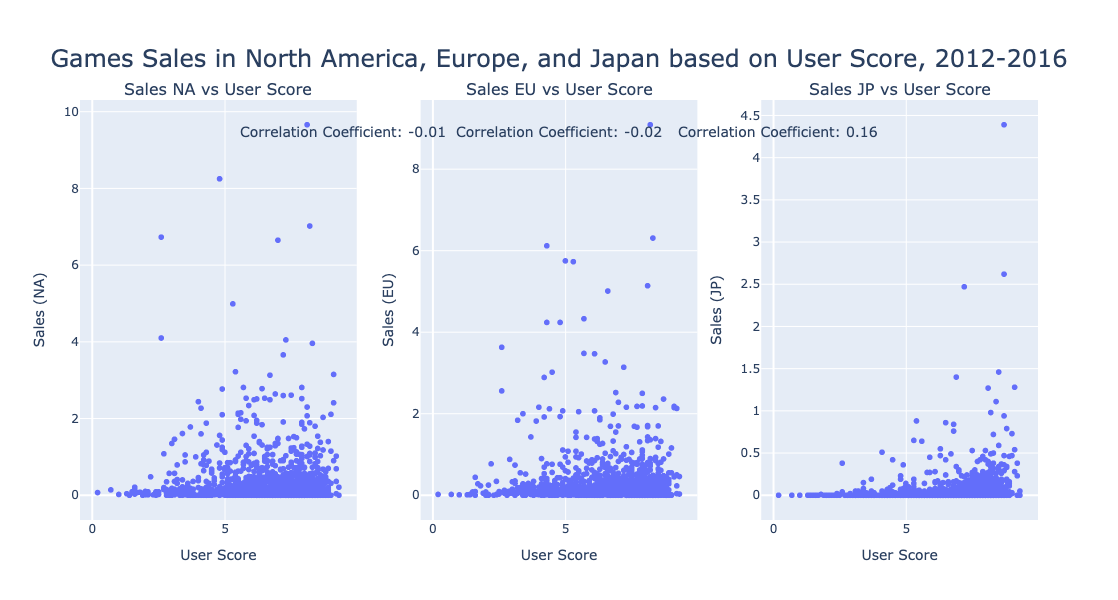

In [874]:
# Create individual scatter plots using Plotly Express
# NORTH AMERICA
fig_na = px.scatter(
    filtered_df, x='user_score', y='sales_na',
    title='Sales North America vs User Score',
    labels={'sales_na': 'Sales (North America)', 'user_score': 'User Score'}
)
# EUROPE
fig_eu = px.scatter(
    filtered_df, x='user_score', y='sales_eu',
    title='Sales Europe vs User Score',
    labels={'sales_eu': 'Sales (Europe)', 'user_score': 'User Score'}
)
# JAPAN
fig_jp = px.scatter(
    filtered_df, x='user_score', y='sales_jp',
    title='Sales JP vs User Score',
    labels={'sales_jp': 'Sales (Japan)', 'user_score': 'User Score'}
)
# Create subplots
fig = make_subplots(
    rows=1, cols=3, subplot_titles=(
        "Sales NA vs User Score",
        "Sales EU vs User Score",
        "Sales JP vs User Score"
    )
)
# Add scatter plots to subplots
for trace in fig_na.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig_eu.data:
    fig.add_trace(trace, row=1, col=2)
for trace in fig_jp.data:
    fig.add_trace(trace, row=1, col=3)
# Update layout with title and axes labels
fig.update_layout(
    title={
        'text': "Games Sales in North America, Europe, and Japan based on User Score, 2012-2016",
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24}
    },
    autosize=False,
    width=1200,
    height=600
)
fig.update_xaxes(title_text="User Score", row=1, col=1, title_font={'size': 14})
fig.update_xaxes(title_text="User Score", row=1, col=2, title_font={'size': 14})
fig.update_xaxes(title_text="User Score", row=1, col=3, title_font={'size': 14})
fig.update_yaxes(title_text="Sales (NA)", row=1, col=1, title_font={'size': 14})
fig.update_yaxes(title_text="Sales (EU)", row=1, col=2, title_font={'size': 14})
fig.update_yaxes(title_text="Sales (JP)", row=1, col=3, title_font={'size': 14})
# Annotate plots with correlation coefficients
fig.add_annotation(
    xref="paper", yref="paper", x=0.165, y=0.95,
    text=f"Correlation Coefficient: {corr_na:.2f}",
    showarrow=False, font=dict(size=14)
)
fig.add_annotation(
    xref="paper", yref="paper", x=0.5, y=0.95,
    text=f"Correlation Coefficient: {corr_eu:.2f}",
    showarrow=False, font=dict(size=14)
)
fig.add_annotation(
    xref="paper", yref="paper", x=0.835, y=0.95,
    text=f"Correlation Coefficient: {corr_jp:.2f}",
    showarrow=False, font=dict(size=14)
)
fig.show()

## Correlation Coefficients
- **North America (-0.01)**:
  - **Correlation Coefficient**: -0.01
  - **Interpretation**: This indicates virtually no correlation between game sales and 'user_score' in North America.

- **Europe (-0.02)**:
  - **Correlation Coefficient**: -0.02
  - **Interpretation**: This also indicates virtually no correlation between game sales and 'user_score' in Europe.
  
- **Japan (0.16)**:
  - **Correlation Coefficient**: 0.16
  - **Interpretation**: This suggests a weak positive correlation between game sales and 'user_score' in Japan, but the relationship is not strong.

### Conclusion
There is no significant correlation between game sales and 'user_score' in North America, Europe, and Japan.

## <span style="color: coral;">Compare a game's sales on various platforms for the years 2012-2016.</span>

#### Find names of games that were sold for more than 3 platforms.

In [878]:
# Filter games for the years 2012-2016
filtered_games_2012_2016 = games[(games['year'] >= 2012) & (games['year'] <= 2016)]

In [879]:
# Group by 'name' and count the number of unique platforms for each game
games_platform_counts = filtered_games_2012_2016.groupby('name')['platform'].nunique().reset_index()

In [880]:
# Rename the columns for clarity
games_platform_counts.columns = ['name', 'unique_platforms']

In [881]:
# Filter games that were sold on more than 3 platforms
games_with_multiple_platforms = games_platform_counts[games_platform_counts['unique_platforms'] > 3]

In [882]:
# Aggregate total sales by game name
total_sales_per_game = games.groupby('name')['total_sales'].sum().reset_index()

In [883]:
# Merge the total sales with the filtered DataFrame
games_with_sales_comparison = pd.merge(games_with_multiple_platforms, total_sales_per_game, on='name')

In [884]:
# Sort by the number of unique platforms
sorted_games = games_with_sales_comparison.sort_values(by='unique_platforms', ascending=False)

# Display the games that were sold on more than 3 platforms along with their total sales
print("Games sold on more than 3 platforms, including total sales:")
display(sorted_games.head(20))

Games sold on more than 3 platforms, including total sales:


name  unique_platforms  total_sales
57            LEGO Marvel Super Heroes                 9         9.41
36                             FIFA 14                 9        16.46
55        LEGO Harry Potter: Years 5-7                 8         4.83
128           The LEGO Movie Videogame                 8         5.09
40                      FIFA Soccer 13                 8        15.97
56                 LEGO Jurassic World                 8         4.69
59                     LEGO The Hobbit                 8         2.43
61        Lego Batman 3: Beyond Gotham                 8         4.26
37                             FIFA 15                 8        17.37
3                Angry Birds Star Wars                 8         1.73
122                           Terraria                 7         1.56
60          LEGO The Lord of the Rings                 7         4.21
114              Skylanders SWAP Force                 7         6.00
53      LEGO Batman 2: DC Super Heroes                 7         6.11
115          Skylanders: SuperChargers                 7         2.08
58              LEGO Marvel's Avengers                 7         2.19
116              Skylanders: Trap Team                 7         4.30
124    The Amazing Spider-Man 2 (2014)                 7         1.40
62   Lego Star Wars: The Force Awakens                 7         1.67
92           Pro Evolution Soccer 2013                 6         2.48

## <span style="color: coral;">Compare selected game sales on various platforms for the years 2012-2016.</span>

### I will compare "FIFA 14", "LEGO Marvel Super Heroes", and "Angry Birds Star Wars" games' sales across multiple platforms, for the years 2012-2016.

In [887]:
# Filter for specific games for the years 2012-2016
specific_games = filtered_games_2012_2016[filtered_games_2012_2016['name'].isin(["FIFA 14", "LEGO Marvel Super Heroes", "Angry Birds Star Wars"])]

In [888]:
# Group by 'name' and 'platform' to get total sales for each game on each platform
games_sales_platform = specific_games.groupby(['name', 'platform'])['total_sales'].sum().reset_index()

In [889]:
# Pivot the data for better comparison
pivot_table = games_sales_platform.pivot(index='platform', columns='name', values='total_sales').fillna(0).reset_index()

print("Comparison of select game sales across multiple platforms for the years 2012-2016:")
print(pivot_table)

Comparison of select game sales across multiple platforms for the years 2012-2016:
name platform  Angry Birds Star Wars  FIFA 14  LEGO Marvel Super Heroes
0         3DS                   0.33     0.23                      0.89
1          DS                   0.00     0.00                      0.38
2          PC                   0.00     0.40                      0.17
3         PS3                   0.29     6.46                      1.83
4         PS4                   0.22     3.01                      1.62
5         PSP                   0.00     0.19                      0.00
6         PSV                   0.08     0.41                      0.51
7         Wii                   0.26     0.38                      0.00
8        WiiU                   0.10     0.00                      0.74
9        X360                   0.28     4.22                      2.22
10       XOne                   0.17     1.16                      1.05


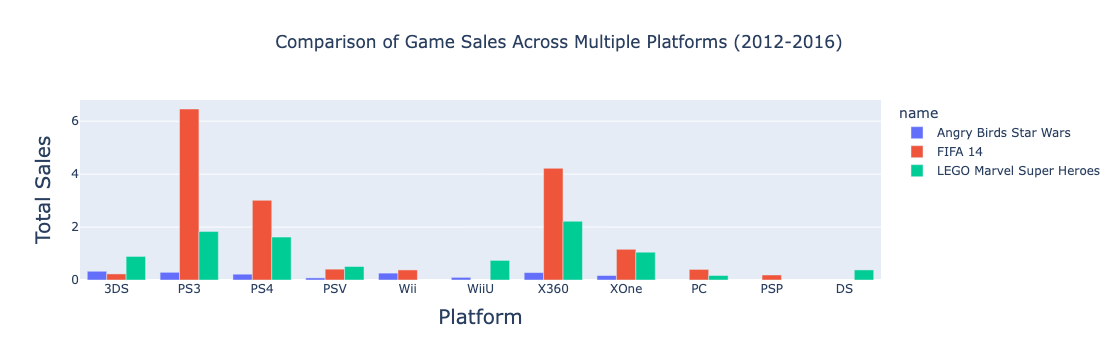

In [890]:
# Create Plotly bar chart using plotly.express
fig = px.bar(
    games_sales_platform,
    x='platform',
    y='total_sales',
    color='name',
    barmode='group',
    title="Comparison of Game Sales Across Multiple Platforms (2012-2016)",
    labels={'platform': 'Platform', 'total_sales': 'Total Sales'} # Notice 'total_sales' label corrected
)

# Update the layout for centered title
fig.update_layout(
    title={
        'text': "Comparison of Game Sales Across Multiple Platforms (2012-2016)",
        'y':0.9, # Adjust the title position
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title={
        'text': 'Platform',
        'font': {'size': 20} # Change axis label size
    },
    yaxis_title={
        'text': 'Total Sales',
        'font': {'size': 20} # Change axis label size
    }
)
# Show the figure
fig.show()

#### Comparison of Games Sales Across Multiple Platforms for the year 2012-2016.
<br>
- FIFA 14 did great on PS3 and X360.
<br>
- LEGO Marvel Super Heroes did its best on X360.
<br>
- Angry Birds Star Wars did not do so well on any of the platforms. But, it did slightly better on 3DS.

## <span style="color: coral;">General Distribution of Games by Genre for the years 2012-2016.</span>

In [893]:
# Count the number of games per genre
genre_counts = filtered_games_2012_2016['genre'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

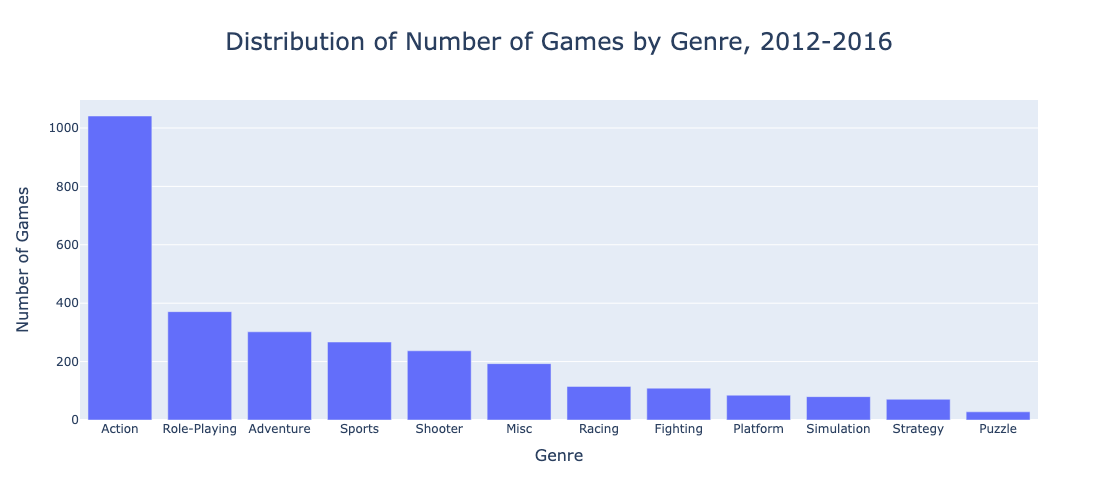

In [1022]:
# Create the bar chart using Plotly Express
fig = px.bar(
    genre_counts,
    x='genre',
    y='count',
    title='Distribution of Number of Games by Genre, 2012-2016',
    labels={'count': 'Number of Games', 'genre': 'Genre'}
)
# Update layout for better visualization
fig.update_layout(
    title={
        'text': 'Distribution of Number of Games by Genre, 2012-2016',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 24}
    },
    xaxis_title={'font': {'size': 16}},
    yaxis_title={'font': {'size': 16}},
    font=dict(size=12),
    autosize=False,
    width=800,
    height=500
)
# Show the plot
fig.show()

#### Action and Sports genres have the most games.

## <span style="color: coral;">Median Sales, by Genre, for the years 2012-2016.</span>

In [1026]:
# Aggregate total sales by game name and platform
genre_sales_med = filtered_games_2012_2016.groupby('genre')['total_sales'].median().reset_index()

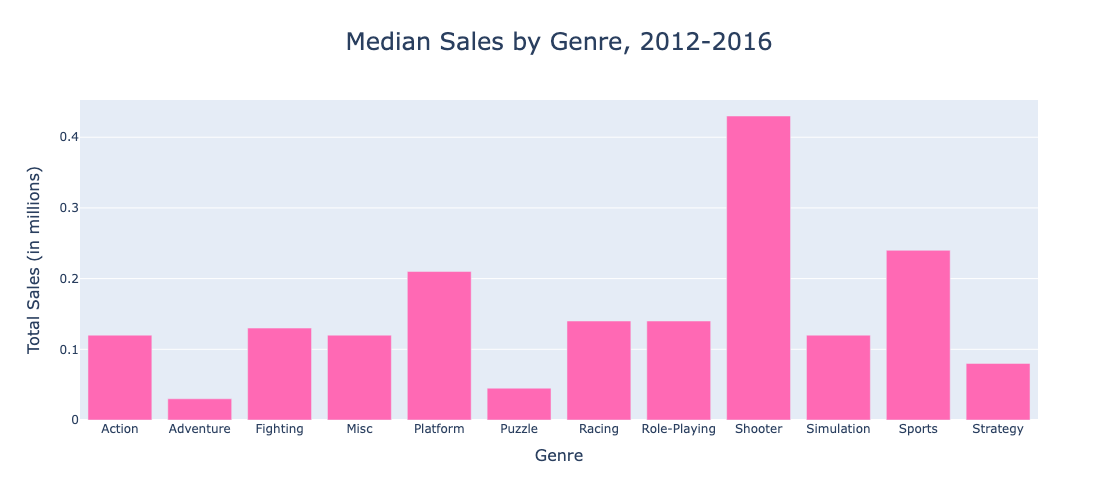

In [1028]:
fig = px.bar(
    genre_sales_med,
    x='genre',
    y='total_sales',
    title='Median Sales by Genre, 2012-2016',
    labels={'total_sales': 'Total Sales (in millions)', 'genre': 'Genre'},
    color_discrete_sequence=['#FF69B4']  # Set bar color to hot pink
)

# Update layout for better visualization
fig.update_layout(
    title={
        'text': 'Median Sales by Genre, 2012-2016',
        'x': 0.5,
        'xanchor': 'center',
        'font': {
            'size': 24
        }
    },
    xaxis_title={'font': {'size': 16}},
    yaxis_title={'font': {'size': 16}},
    font=dict(size=12),
    autosize=False,
    width=800,
    height=500
)
# Show the plot
fig.show()

In [1030]:
#commented out.
#The sales for the Platform genre were the highest, when looking at median price of games.

#### The sales for the Shooter genre were the highest in sales for the years 2012-2016.

## <span style="color: coral;">What are the top 5 gaming platforms for each region ( North America, Europe, Japan ) for the years 2012-2016 ?</span>

In [1034]:
# excluding 'year', 'critic_score', and 'user_score', because I don't want to do math on those columns.
numeric_cols = [col for col in filtered_games_2012_2016.select_dtypes(include=['number']).columns 
                if col not in ['year', 'critic_score', 'user_score']]

In [1036]:
# Group by platform and sum the numeric sales columns for each region
grouped_sales = filtered_games_2012_2016.groupby('platform')[numeric_cols].sum().reset_index()

In [1038]:
# Find the top 5 platforms for each region
top_5_na = grouped_sales.nlargest(5, 'sales_na')[['platform', 'sales_na']]
top_5_eu = grouped_sales.nlargest(5, 'sales_eu')[['platform', 'sales_eu']]
top_5_jp = grouped_sales.nlargest(5, 'sales_jp')[['platform', 'sales_jp']]

print("\n")
print("\nTop 5 Platforms for North America Sales, for the sum of sales for the years 2012-2016:")
display(top_5_na)
print("\n")
print("Top 5 Platforms for Europe Sales, for the sum of sales for the years 2012-2016:")
display(top_5_eu)
print("\n")
print("Top 5 Platforms for Japan Sales, for the sum of sales for the years 2012-2016:")
display(top_5_jp)




Top 5 Platforms for North America Sales, for the sum of sales for the years 2012-2016:


platform  sales_na
9      X360    140.57
4       PS4    108.74
3       PS3    103.74
10     XOne     93.12
0       3DS     55.49



Top 5 Platforms for Europe Sales, for the sum of sales for the years 2012-2016:


platform  sales_eu
4       PS4    141.09
3       PS3    107.26
9      X360     74.89
10     XOne     51.59
0       3DS     42.83



Top 5 Platforms for Japan Sales, for the sum of sales for the years 2012-2016:


platform  sales_jp
0      3DS     87.79
3      PS3     35.29
6      PSV     21.11
4      PS4     15.96
8     WiiU     13.01

#### During the years of 2012-2016, X360 did best in North America, PS4 did best in Europe, and 3DS did best in Japan.  PS3 did very well in all 3 regions.

## <span style="color: coral;">What are the 5 most profitable genres for the years of 2012-2016 ?</span>

In [1042]:
filtered_games_2012_2016.genre.value_counts()

genre
Action          1041
Role-Playing     371
Adventure        302
Sports           267
Shooter          237
Misc             193
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: count, dtype: int64

In [1044]:
print(len(filtered_games_2012_2016))

2899


In [1046]:
result = round(1032 / 2887, 2)
print(result)

0.36


#### There are 12 genres.  During the years of 2012-2016, Action games represent about 36% of all games.

In [1049]:
# Calculate the median of the 'total_sales' column
median_total_sales_2012_2016 = filtered_games_2012_2016['total_sales'].median()

In [1051]:
# Group by genre and sum the total sales
genre_sales = filtered_games_2012_2016.groupby('genre')[['total_sales']].sum().reset_index()

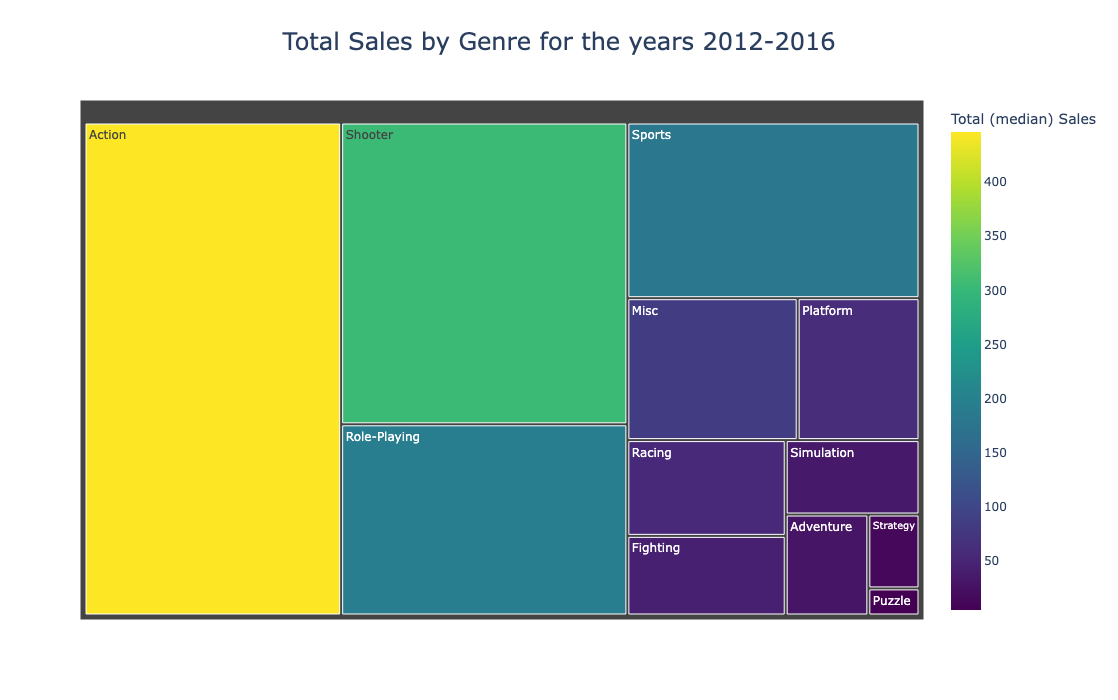

In [1053]:
fig = px.treemap(genre_sales, path=['genre'], values='total_sales', title='Total Sales by Genre for the years 2012-2016.',
                 labels={'total_sales': 'Total (median) Sales', 'genre': 'Genre'},
                 color='total_sales',  # Color blocks based on total sales
                 color_continuous_scale='Viridis')

# Update layout to set a larger size
fig.update_layout(
    autosize=False,
    width=900,
    height=700,
    title={
        'text': "Total Sales by Genre for the years 2012-2016",
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 24}
    }
)
# Display the plot
fig.show()

In [1055]:
#Platform genre has the highest amount in sales, with Shooter genre a close 2nd.
#Adventure genre has the lowest amount in sales, with Strategy and Puzzle next lowest.

#### Action genre has the highest median sales, with Shooter genre a close 2nd.
#### Puzzle genre has the lowest median sales, with Strategy and Adventure next lowest.

In [1058]:
#The top 5 genres, for (median) sales, are: 
# Platform ( a sub genre of Action )
# Shooter
# Sports
# Fighting
# Action 

### The top 5 genres, for (median) sales, for the years 2012-2016 are: 
- Action 
- Shooter
- Role-Playing
- Sports
- Misc 

## <span style="color: coral;">User Profile for each region for 2012-2016.</span>

### <span style="color: coral;">What are total sales, by region?</span>

### Filter out NaN and zero values.

In [1064]:
# Filter out NaN and zero values for visualization, only keeping relevant columns
filtered_for_graph_na = filtered_games_2012_2016[['sales_na']].dropna()
filtered_for_graph_na = filtered_for_graph_na[filtered_for_graph_na['sales_na'] != 0]

filtered_for_graph_eu = filtered_games_2012_2016[['sales_eu']].dropna()
filtered_for_graph_eu = filtered_for_graph_eu[filtered_for_graph_eu['sales_eu'] != 0]

filtered_for_graph_jp = filtered_games_2012_2016[['sales_jp']].dropna()
filtered_for_graph_jp = filtered_for_graph_jp[filtered_for_graph_jp['sales_jp'] != 0]

In [1066]:
# create dictionary. Keys are regions. Values are the sums(without NaN or zeroes.)
region_sales = {
    'North America': filtered_for_graph_na['sales_na'].sum(),
    'Europe': filtered_for_graph_eu['sales_eu'].sum(),
    'Japan': filtered_for_graph_jp['sales_jp'].sum()
}

In [1068]:
# Convert the dictionary to a DataFrame for visualization
region_sales_df = pd.DataFrame(list(region_sales.items()), columns=['Region', 'Total Sales'])

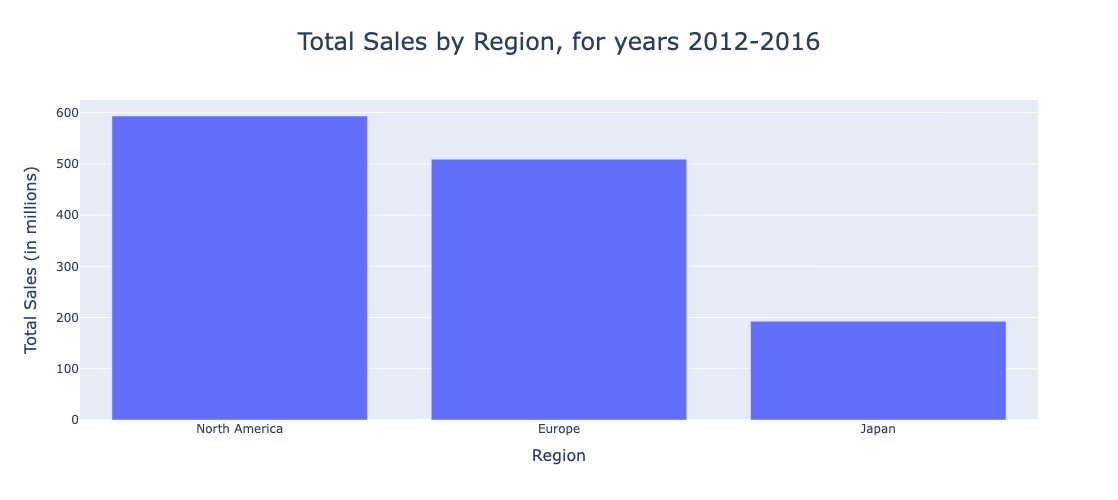

In [1070]:
# Create the bar chart using Plotly Express
fig = px.bar(
    region_sales_df,
    x='Region',
    y='Total Sales',
    title='Total Sales by Region',
    labels={'Total Sales': 'Total Sales (in millions)', 'Region': 'Region'}
)

# Update layout for better visualization
fig.update_layout(
    title={
        'text': 'Total Sales by Region, for years 2012-2016',
        'x': 0.5,
        'xanchor': 'center',
        'font': {
            'size': 24
        }
    },
    xaxis_title={'font': {'size': 16}},
    yaxis_title={'font': {'size': 16}},
    font=dict(size=12),
    autosize=False,
    width=800,
    height=500
)
# Show the plot
fig.show()

In [1072]:
#commented out.
#Most sales are from North America (4.4 billion ). The least sales are from Japan ( 1.29 billion ).

#### North America had a sum of 591 million in sales for the years 2012-2016 ... more than double the sales in Japan.
#### Europe had a sum of 507 million in sales for the years 2012-2016.
#### Japan had a sum of 193 million in sales for the years 2012-2016.

## <span style="color: coral;">What are the top 5 platforms, by region for the years 2012-2016 ?</span>

### <span style="color: coral;">North America</span>

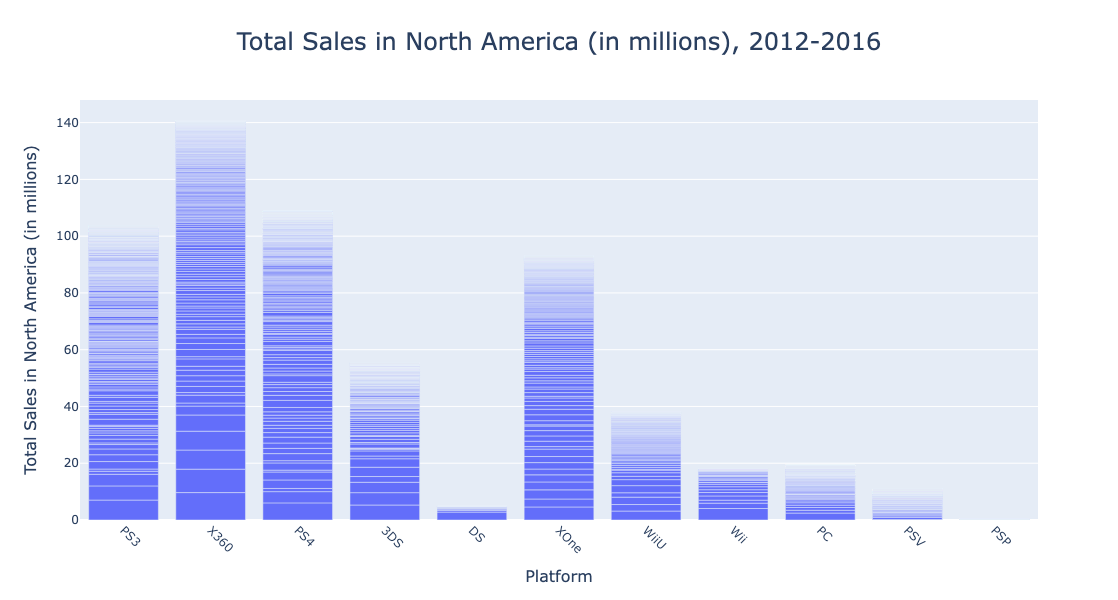

In [1077]:
# Create the bar chart using Plotly Express
fig = px.bar(
    filtered_games_2012_2016,
    x='platform',
    y='sales_na',
    title='Platform sales in North America, 2012-2016',
    labels={'sales_na': 'Total Sales in North America (in millions)', 'platform': 'Platform'}
)

# Update layout for better visualization
fig.update_layout(
    title={
        'text': 'Total Sales in North America (in millions), 2012-2016',
        'x': 0.5,
        'xanchor': 'center',
        'font': {
            'size': 24
        }
    },
    xaxis_title={'font': {'size': 16}},
    yaxis_title={'font': {'size': 16}},
    font=dict(size=12),
        xaxis=dict(
        tickangle=45  # Rotate x-axis labels by 45 degrees
    ),
    autosize=False,
    width=1000,
    height=600
)

# Show the plot
fig.show()

In [1079]:
#commented out
#In North America, the 5 top sales were on these platforms:
#X360
#PS2
#Wii
#DS
#PS3

#### In North America, for the years 2012-2016, the top 5 sales were on these platforms:
- X360
- PS4
- PS3
- XOne
- 3DS

### <span style="color: coral;">Europe</span>

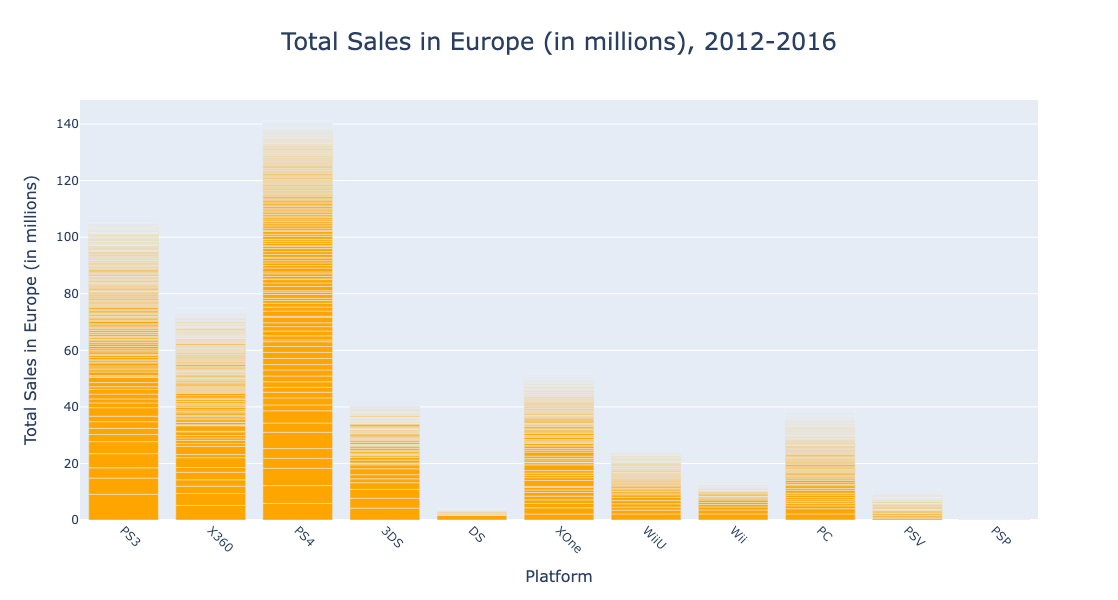

In [1083]:
# Create the bar chart using Plotly Express
fig = px.bar(
    filtered_games_2012_2016,
    x='platform',
    y='sales_eu',
    title='Platform sales in Europe, for 2012-2016',
    
    labels={'sales_eu': 'Total Sales in Europe (in millions)', 'platform': 'Platform'},
    color_discrete_sequence=['orange']  # Set bar color to orange
)

# Update layout for better visualization
fig.update_layout(
    title={
        'text': 'Total Sales in Europe (in millions), 2012-2016',
        'x': 0.5,
        'xanchor': 'center',
        'font': {
            'size': 24
        }
    },
    xaxis_title={'font': {'size': 16}},
    yaxis_title={'font': {'size': 16}},
    font=dict(size=12),
        xaxis=dict(
        tickangle=45  # Rotate x-axis labels by 45 degrees
    ),
    autosize=False,
    width=1000,
    height=600
)

# Show the plot
fig.show()

In [1084]:
#commented out
#In Europe, the 5 top sales were on these platforms:
# PS2
# PS3
# X360
# Wii
# PS

#### In Europe, for the years 2012-2016, the top 5 sales were on these platforms:
- PS4
- PS3
- X360
- XOne
- 3DS

### <span style="color: coral;">Japan</span>

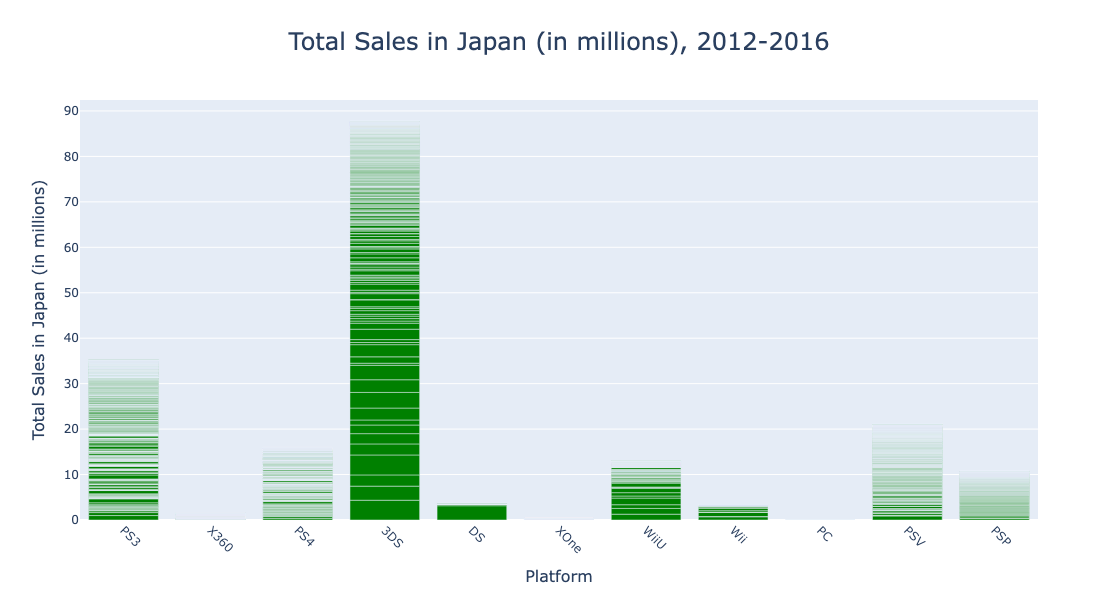

In [1089]:
# Create the bar chart using Plotly Express
fig = px.bar(
    filtered_games_2012_2016,
    x='platform',
    y='sales_jp',
    title='Platform sales in Japan',
    labels={'sales_jp': 'Total Sales in Japan (in millions)', 'platform': 'Platform'},
    color_discrete_sequence=['green']  # Set bar color to orange
)

# Update layout for better visualization
fig.update_layout(
    title={
        'text': 'Total Sales in Japan (in millions), 2012-2016',
        'x': 0.5,
        'xanchor': 'center',
        'font': {
            'size': 24
        }
    },
    xaxis_title={'font': {'size': 16}},
    yaxis_title={'font': {'size': 16}},
    font=dict(size=12),
        xaxis=dict(
        tickangle=45  # Rotate x-axis labels by 45 degrees
    ),
    autosize=False,
    width=1000,
    height=600
)

# Show the plot
fig.show()

In [1090]:
#commented out
#In Japan, the 5 top sales were on these platforms:
# DS
# PS
# PS2
# SNES
# NES

#### In Japan, for the years 2012-2016, the top 5 sales were on these platforms:
- 3DS
- PS3
- PSV
- PS4
- WIIU

## <span style="color: coral;">What are the top 5 genres, by region for 2012-2016 ?</span>

### <span style="color: coral;">North America</span>

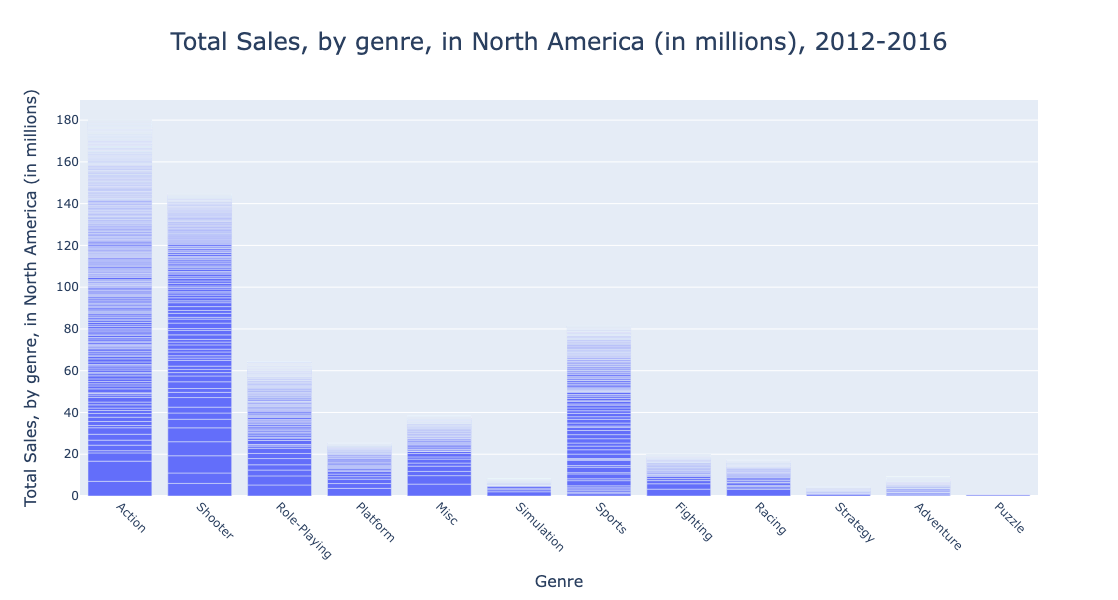

In [1096]:
# Create the bar chart using Plotly Express
fig = px.bar(
    filtered_games_2012_2016,
    x='genre',
    y='sales_na',
    title='Sales, by genre, in North America',
    labels={'sales_na': 'Total Sales, by genre, in North America (in millions)', 'genre': 'Genre'}
)

# Update layout for better visualization
fig.update_layout(
    title={
        'text': 'Total Sales, by genre, in North America (in millions), 2012-2016',
        'x': 0.5,
        'xanchor': 'center',
        'font': {
            'size': 24
        }
    },
    xaxis_title={'font': {'size': 16}},
    yaxis_title={'font': {'size': 16}},
    font=dict(size=12),
        xaxis=dict(
        tickangle=45  # Rotate x-axis labels by 45 degrees
    ),
    autosize=False,
    width=1000,
    height=600
)

# Show the plot
fig.show()

In [1098]:
#commented out
#The top 5 sales totals, for North America, by genre are:
# Action
# Sports
# Shooter
# Platform
# Misc ( this could include : Atari, Sega Genesis, Commodore 64, Ouya)

#### The top 5 sales totals in North America, by genre, for 2012-2016:
- Action
- Shooter
- Sports
- Role-Playing
- Misc.

### <span style="color: coral;">Europe</span>

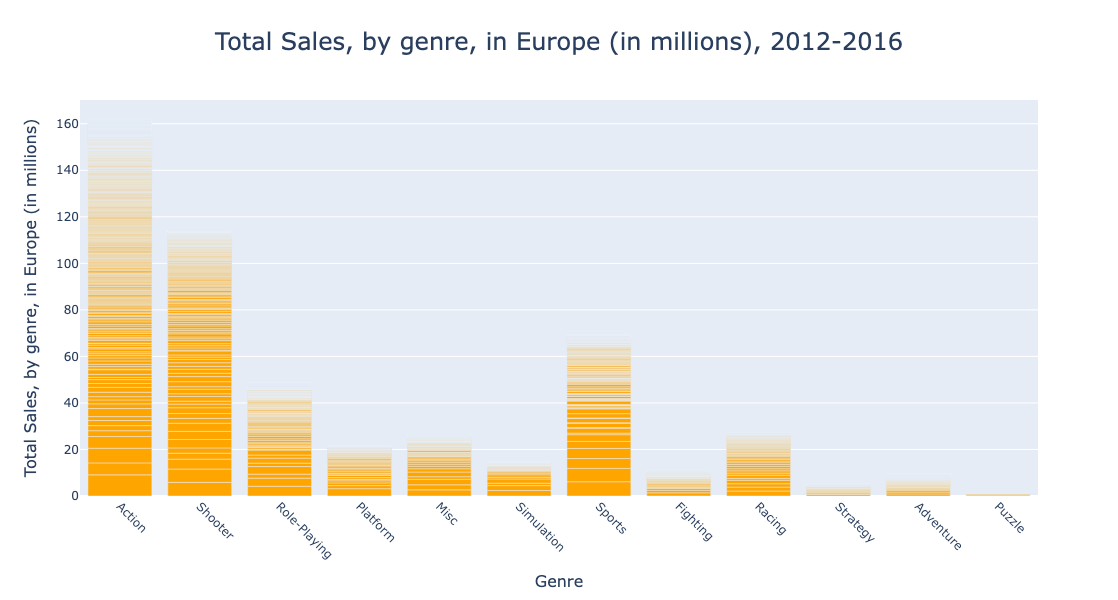

In [1102]:
# Create the bar chart using Plotly Express
fig = px.bar(
    filtered_games_2012_2016,
    x='genre',
    y='sales_eu',
    title='Sales, by genre, in Europe',
    labels={'sales_eu': 'Total Sales, by genre, in Europe (in millions)', 'genre': 'Genre'},
    color_discrete_sequence=['orange']  # Set bar color to orange
)

# Update layout for better visualization
fig.update_layout(
    title={
        'text': 'Total Sales, by genre, in Europe (in millions), 2012-2016',
        'x': 0.5,
        'xanchor': 'center',
        'font': {
            'size': 24
        }
    },
    xaxis_title={'font': {'size': 16}},
    yaxis_title={'font': {'size': 16}},
    font=dict(size=12),
        xaxis=dict(
        tickangle=45  # Rotate x-axis labels by 45 degrees
    ),
    autosize=False,
    width=1000,
    height=600
)

# Show the plot
fig.show()

In [1104]:
#commented out
#the top 5 sales totals, for Europe, by genre are:
# Action
# Sports
# Shooter
# Racing
# Misc ( this could include : Atari, Sega Genesis, Commodore 64, Ouya)

#### The top 5 sales totals, for Europe, by genre, for 2012-2016:
- Action
- Shooter
- Sports
- Role-Playing
- Racing

### <span style="color: coral;">Japan</span>

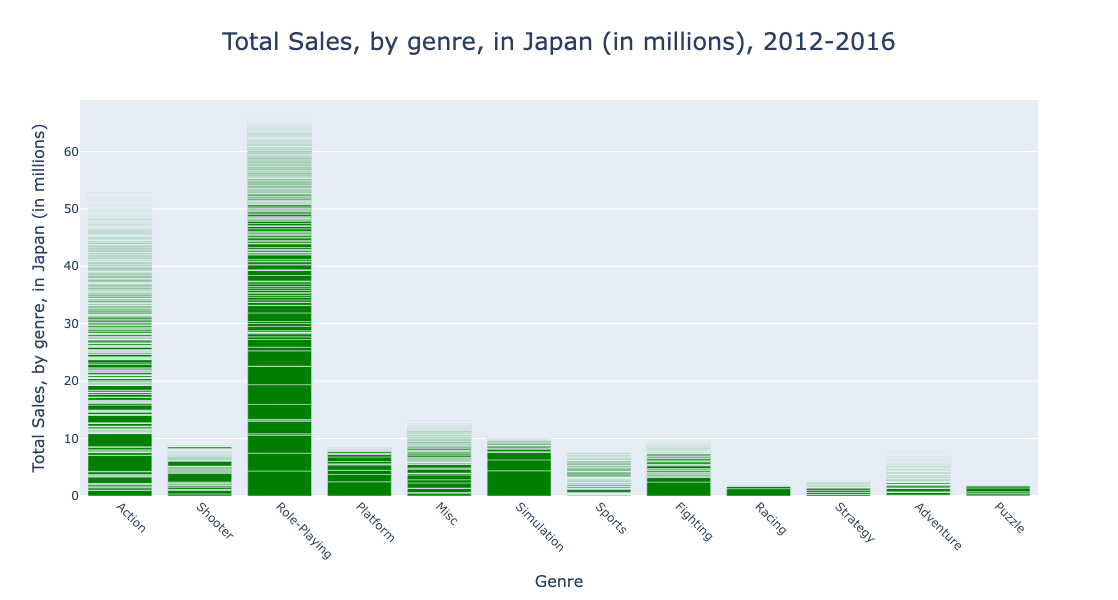

In [1108]:
# Create the bar chart using Plotly Express
fig = px.bar(
    filtered_games_2012_2016,
    x='genre',
    y='sales_jp',
    title='Sales, by genre, in Japan',
    labels={'sales_jp': 'Total Sales, by genre, in Japan (in millions)', 'genre': 'Genre'},
    color_discrete_sequence=['green']  # Set bar color to orange
)

# Update layout for better visualization
fig.update_layout(
    title={
        'text': 'Total Sales, by genre, in Japan (in millions), 2012-2016',
        'x': 0.5,
        'xanchor': 'center',
        'font': {
            'size': 24
        }
    },
    xaxis_title={'font': {'size': 16}},
    yaxis_title={'font': {'size': 16}},
    font=dict(size=12),
        xaxis=dict(
        tickangle=45  # Rotate x-axis labels by 45 degrees
    ),
    autosize=False,
    width=1000,
    height=600
)

# Show the plot
fig.show()

In [1110]:
#commented out
#The top 5 sales totals, for Japan, by genre are:
# Role-Playing
# Action
# Sports
# Platform
# Misc ( this could include : Atari, Sega Genesis, Commodore 64, Ouya)

#### The top 5 sales totals, for Japan, by genre, for 2012-2016:
- Role-Playing
- Action
- Misc.
- Simulation
- Fighting

## <span style="color: coral;">Do ESRB ratings affect sales in individual regions (2012-2016) ? </span>

### <span style="color: coral;">North America</span>

In [1115]:
filtered_games_2012_2016.rating.value_counts()

rating
None    2899
Name: count, dtype: int64

#### There are a lot of "None" ratings.

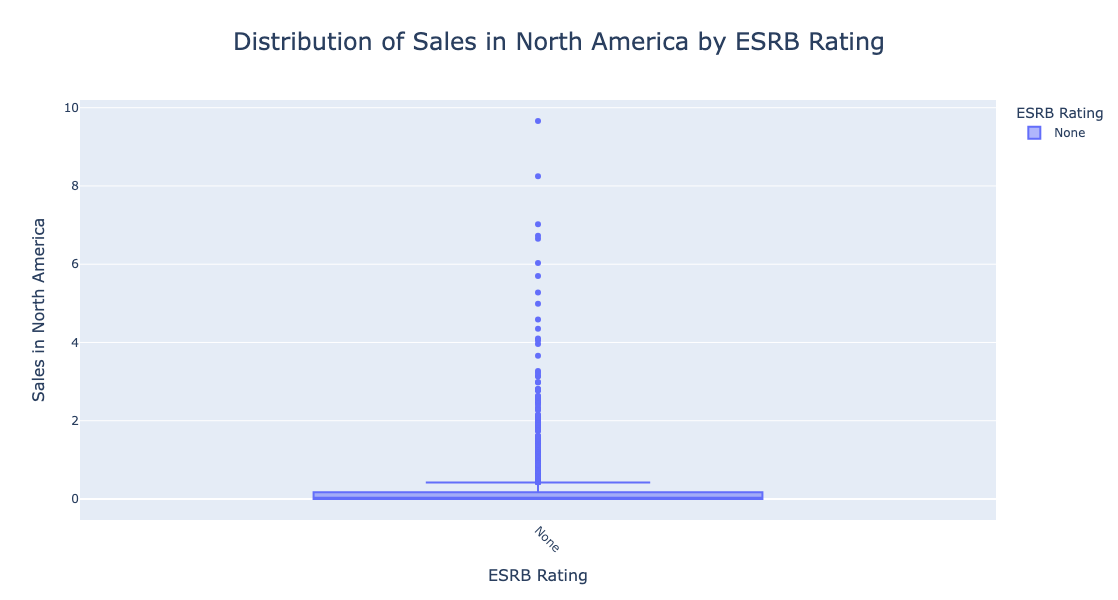

In [1118]:
# Create the box plot using Plotly Express
fig = px.box(
    filtered_games_2012_2016,
    x='rating',
    y='sales_na',
    title='Distribution of Sales in North America by ESRB Rating',
    labels={'sales_na': 'Sales in North America (in millions)', 'rating': 'ESRB Rating'},
    color='rating'  # Different colors for each rating category
)
# Update layout for better visualization
fig.update_layout(
    title={
        'text': 'Distribution of Sales in North America by ESRB Rating',
        'x': 0.5,
        'xanchor': 'center',
        'font': {
            'size': 24
        }
    },
    xaxis_title={'font': {'size': 16}},
     yaxis_title={
        'text': 'Sales in North America',
        'font': {'size': 16}
    },
    font=dict(size=12),
    xaxis=dict(
        tickangle=45  # Rotate x-axis labels by 45 degrees
    ),
    autosize=False,
    width=1000,
    height=600
)
# Show the plot
fig.show()

#### The 'M' rated games bring in the most sales in North America.

### <span style="color: coral;">Europe</span>

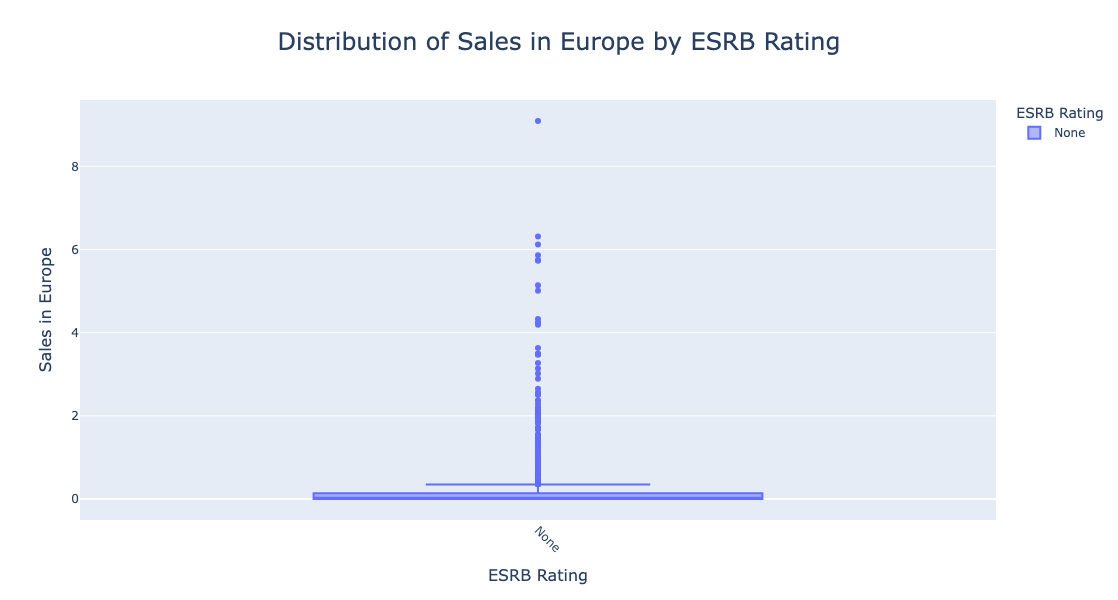

In [1122]:
# Create the box plot using Plotly Express
fig = px.box(
    filtered_games_2012_2016,
    x='rating',
    y='sales_eu',
    title='Distribution of Sales in Europe by ESRB Rating',
    labels={'sales_na': 'Sales in Europe (in millions)', 'rating': 'ESRB Rating'},
    color='rating'  # Different colors for each rating category
)
# Update layout for better visualization
fig.update_layout(
    title={
        'text': 'Distribution of Sales in Europe by ESRB Rating',
        'x': 0.5,
        'xanchor': 'center',
        'font': {
            'size': 24
        }
    },
    xaxis_title={'font': {'size': 16}},
     yaxis_title={
        'text': 'Sales in Europe',
        'font': {'size': 16}
    },
    font=dict(size=12),
    xaxis=dict(
        tickangle=45  # Rotate x-axis labels by 45 degrees
    ),
    autosize=False,
    width=1000,
    height=600
)
# Show the plot
fig.show()

#### The 'M' rated games bring in the most sales in Europe.

### <span style="color: coral;">Japan</span>

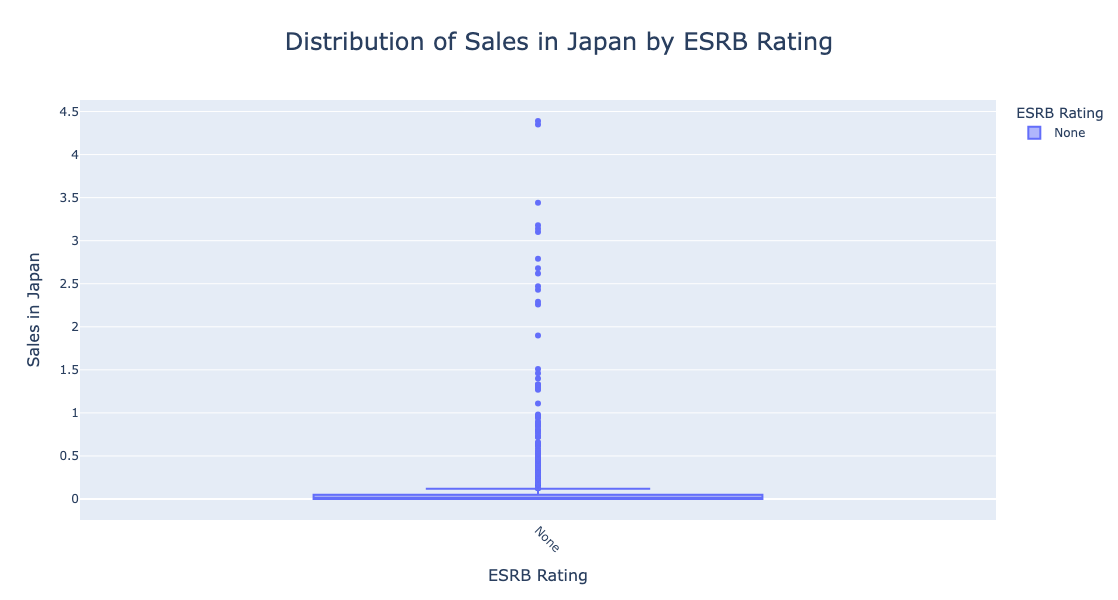

In [1126]:
# Create the box plot using Plotly Express
fig = px.box(
    filtered_games_2012_2016,
    x='rating',
    y='sales_jp',
    title='Distribution of Sales in Japan by ESRB Rating',
    labels={'sales_na': 'Sales in Japan (in millions)', 'rating': 'ESRB Rating'},
    color='rating'  # Different colors for each rating category
)
# Update layout for better visualization
fig.update_layout(
    title={
        'text': 'Distribution of Sales in Japan by ESRB Rating',
        'x': 0.5,
        'xanchor': 'center',
        'font': {
            'size': 24
        }
    },
    xaxis_title={'font': {'size': 16}},
     yaxis_title={
        'text': 'Sales in Japan',
        'font': {'size': 16}
    },
    font=dict(size=12),
    xaxis=dict(
        tickangle=45  # Rotate x-axis labels by 45 degrees
    ),
    autosize=False,
    width=1000,
    height=600
)
# Show the plot
fig.show()

#### The 'T' rated games bring in the most sales in Japan.  The 'E10+' rated games bring the least sales in Japan.

## <span style="color: coral;">Hypothesis testing:</span>

### <span style="color: coral;">&nbsp;&nbsp;&nbsp;&nbsp;Hypothesis: The average 'user_rating" of the Xbox One platform is the same as the PC platform.</span>

### <span style="color: coral;">&nbsp;&nbsp;&nbsp;&nbsp;Alternative hypothesis: The average 'user_rating' of the Xbox One platform is NOT the same as the PC platform.</span>

In [1132]:
filtered_games_2012_2016.platform.value_counts()

platform
PS3     493
PSV     412
3DS     397
PS4     392
X360    294
PC      255
XOne    247
PSP     175
WiiU    147
Wii      55
DS       32
Name: count, dtype: int64

#### There are 294 X360 games, and 255 PC games during the time frame of 2012-2016.

In [1135]:
# Filter user ratings for Xbox One and PC
xbox_ratings = filtered_games_2012_2016[
    (filtered_games_2012_2016['platform'] == 'XOne') &
    (filtered_games_2012_2016['user_score'] > 0)
]['user_score']

pc_ratings = filtered_games_2012_2016[
    (filtered_games_2012_2016['platform'] == 'PC') &
    (filtered_games_2012_2016['user_score'] > 0)
]['user_score']

In [1137]:
# Check for NaNs in the data
print(f'Xbox ratings NaNs: {np.isnan(xbox_ratings).sum()}')
print(f'PC ratings NaNs: {np.isnan(pc_ratings).sum()}')

Xbox ratings NaNs: 0
PC ratings NaNs: 0


In [1139]:
print(f'Length of XOne ratings: {len(xbox_ratings)}')
print(f'Length of PC ratings: {len(pc_ratings)}')

Length of XOne ratings: 182
Length of PC ratings: 211


In [1141]:
# Set significance level
alpha = 0.05

# Perform the two-sample t-test 
results = st.ttest_ind(xbox_ratings, pc_ratings, equal_var=False)

# Print the p-value
print('p-value:', results.pvalue)

# Compare the p-value with the significance level
if results.pvalue < alpha:
    print("We reject the null hypothesis: The mean user ratings for Xbox One and PC games are different.")
else:
    print("We can't reject the null hypothesis: There is no significant difference in the mean user ratings for Xbox One and PC games.")


p-value: 0.6206366351489678
We can't reject the null hypothesis: There is no significant difference in the mean user ratings for Xbox One and PC games.


## Conclusion of this test
### We DO NOT reject the null hypothesis because the p-value (0.062) is greater than the alpha level (0.05).
### This means that we have sufficient evidence to conclude that the average 'user_rating' of the Xbox One platform is the same as the PC platform.
### I chose the standard threshold (alpha) of 0.05. In other words, there is a 5% probability of making a Type I error (false positive). Given that the p-value is less than alpha, this conclusion is statistically significant.

### <span style="color: coral;">&nbsp;&nbsp;&nbsp;&nbsp;Hypothesis: The average 'user_rating' of Action genre and Sports genre are different.</span>

### <span style="color: coral;">&nbsp;&nbsp;&nbsp;&nbsp;Alternative hypothesis: The average 'user_rating' of Action genre and Sports genre are NOT different.</span>

In [1146]:
# Filter for Action genre, years 2012-2016, and user_score > 0
action_ratings = games[
    (games['genre'] == 'Action') &
    (games['year'] >= 2012) &
    (games['year'] <= 2016) &
    (games['user_score'] > 0)
]['user_score']

# Filter for Sports genre, years 2012-2016, and user_score > 0
sports_ratings = games[
    (games['genre'] == 'Sports') &
    (games['year'] >= 2012) &
    (games['year'] <= 2016) &
    (games['user_score'] > 0)
]['user_score']

In [1148]:
# Set significance level
alpha = 0.05

# Perform the two-sample t-test (Welch's t-test)
print("\n")
results = st.ttest_ind(action_ratings, sports_ratings, equal_var=False)
print(f"t-statistic: {results.statistic:.2f}")
print("\n")
print(f"p-value: {results.pvalue:.4f}")

# Compare the p-value with the significance level to decide on the null hypothesis
if results.pvalue < alpha:
    print("Reject the null hypothesis: The average user ratings of Action and Sports genre games are different.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average user ratings of Action and Sports genre games.")



t-statistic: 9.95


p-value: 0.0000
Reject the null hypothesis: The average user ratings of Action and Sports genre games are different.


## Conclusion of this test
The t-test resulted in a t-statistic of 9.95, which is very high, and a p-value of 0.0000. Given that the p-value is significantly less than the standard alpha level, of 0.05, we reject the null hypothesis, which states that the average user ratings of Action and Sports genre games are the same.
This statistically significant result provides strong evidence to conclude that there is a difference in the average user ratings between Action and Sports genre games. This means that the average 'user_rating' for Action games is not the same as that for Sports games. The extremely low p-value indicates that the observed difference is highly unlikely to have occurred by random chance alone, suggesting a real difference in user ratings between these two game genres.

<div style="background-color: rgb(255, 176, 155); padding: 10px; border-radius: 5px;">
    <h2>Conclusion:</h2>
</div>

## Games released per year:
- After 1993, number of games increase
- Most games were released between the years of 2005-2011 
- The largest games released, in a year, were in the years 2008 and 2009, with about 1400 games for each of those years.
- The market stabilizes in the year 2012.

## Total Sales by Game:
- Wii Sport brought in the highest total sales (\$82 million), with half of those sales being from North America.
- Super Mario Bros. was the 2nd highest game for total sales (\$40.2 million), with almost 75\% being from North America.

## Total Sales by Genre nearing the year 2016:
- Action, Shooter, Sports, Role-Playing (highest to lowest, in that order)
- Action genre makes up 36\% of all games, so this might explain why Action sales are highest.

## Median Sales by Genre:
- Taking the median sales per game, Shooter genre is the highest in sales.

## Total Sales by Platform, for all years:
- PS2 brought in the most sales overall, with a total of \$1.25 billion, with the highest sales being in the years 2001-2004.
= X360 and PS3 brought in over 900 million each.
<br>

## Average lifespan of a Gaming Platform:
- 10 years

## Gaming Platform Spans:
- PS2 2000-2011 , 12 years
- DS 2004-2013 , 10 years
- X360 2005-2016 , 12 years
- PS3 2006-2016 , 11 years
- 3DS 2010-2016 , 7 years
- PS4 2013-2016, 4 years
<br>
### Keep in mind that this data set only goes to the year 2016, so, although X360, PS3, 3DS, and PS4 go til 2016, that may not necessarily be thier last year, as the dataset does not have data for the year 2017.
<br>

## Selected Games Compared Across Various Platforms:
- "Lego Marvel Super Heroes" was released on 9 different platforms, and brought in a total of \$9.4 million.
<br>
- "FIFA 14" was released on 9 different platforms, and brought in a total of \$16.46 million. It had higher sales than the other two games, and had most of its sales were on X360 and PS3.
<br>
- "Angry Birds Star Wars" was released on 8 different platforms, and brought in \$1.73 million. It had low sales, but did it's best on 3DS.
<br>
<br>

## Distribution of Games, by Genre:
<br>
- The most profitable genre is Action ( \$ 1.73 billion in total sales)
<br>
- Second most profitable genre is Sports ( \$ 1.32 billion in total sales )
<br>
- The least profitable genre is Strategy ( \$ 173 million in total sales )
<br>
- The second and third lowest, almost at a tie, are Adventure and Puzzle genres ( approx. 140 million each )
<br>
<br>

## User Profile:
<h3>North America</h3>
<br>
The top 5 gaming platforms are:
<br>
- &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; X360<br>
- &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; PS4<br>
- &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; PS3<br>
- &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; XOne<br>
- &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 3DS<br>

<br>
The top 5 genres are:
<br>
- &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Action<br>
- &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Shooter<br>
- &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Sports<br>
- &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Role-Playing<br>
- &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Misc<br>

<br>
Platform with highest sales:
- X360
<br>
Games that did well in all 3 regions:
- Pokemon


<h3>Europe</h3>
<br>
The top 5 gaming platforms are:
<br>
- &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; PS4<br>
- &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; PS3<br>
- &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; X360<br>
- &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; XOne<br>
- &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 3DS<br>

<br>
The top 5 genres are:
<br>
- &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Action<br>
- &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Shooter<br>
- &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Sports<br>
- &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Role-Playing<br>
- &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Racing<br>

<br>
Platform with highest sales:
- PS4
<br>
Games that did well in all 3 regions:
- Pokemon


<h3>Japan</h3>
<br>
The top 5 gaming platforms are:
<br>
- &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 3DS<br>
- &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; PS3<br>
- &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; PSV<br>
- &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; PS4<br>
- &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; WiiU<br>

<br>
The top 5 genres are:
<br>
- &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Role-Playing<br>
- &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Action<br>
- &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Misc.<br>
- &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Simulation<br>
- &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Fightin<br>
<br>
Platform with highest sales:
- 3DS
<br>
Games that did well in all 3 regions:
- Pokemon
<br>
Games that did not do well here:
- "Grand Theft Auto V" and "Grand Theft Auto: San Andreas"
<br>

<H2><b>Hypothesis Testing:</b></H2>
<br>
<br>
<b>Test 1 hypothesis</b>
<br>
- &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Hypothesis: Average user ratings of the Xbox One and PC platforms are the same.
<br>
- &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Alt. Hypothesis: Average user ratings of the Xbox One and PC platforms are NOT the same.
<br>
<br>
<b>Test 1 result</b>
<br>
- We reject the null hypothesis because the p-value (0.0488) is less than the alpha level (0.05).
- This means that we have sufficient evidence to conclude that the average 'user_rating' of the Xbox One platform is NOT the same as the PC platform.
<br> 
<br>

<b>Test 2 hypothesis</b>
- &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Hypothesis: Average user ratings for the Action and Sports genres are the same.
<br>
- &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Alt. Hypothesis: Average user ratings for the Action and Sports genres are NOT the same.
<br>
<br>
<b>Test 2 result</b>
<br>
- We reject the null hypothesis, because the p-value (0.0) is less than the alpha level (0.5)
- Therefore, the average user ratings of Action and Sports genre games are different. <br>
<br>
<br>

Alpha was set to the standard, 0.05 for each of these tests.
While "alpha" is a threshold, "significance level" ( 5 % ) is the probability of making a Type I error given that threshold.
For clarification, if the test produces a p-value that is less than the alpha of 0.05, we reject the null hypothesis.
<br>
<br>
<br>

## Critic Reviews:
- There is a moderate positive correlation between PS3 game sales and critic scores in North America and Europe, indicating that higher critic scores tend to be associated with higher sales in these regions. However, the correlations are not particularly strong, suggesting that other factors also influence sales. In Japan, the correlation is weaker, suggesting that critic scores have a less significant impact on PS3 game sales, and other market-specific factors likely play a more significant role.

## User Reviews:
- There is no significant correlation between game sales and 'user_score' in North America, Europe, and Japan.
<br>

<b>Predictions for 2017:</b>
- &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; PS4 is still going strong in 2016, with 69 million in sales. 2015 had sales of 119 million. It would seem that PS4 will still be going strong, in 2017, with about 60 million in sales.
- &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; PS4 should have high sales for 6 more years, after 2016, going in to year 2023.
- &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; XOne should also do well in 2017.
- &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Action and Shooter genre are expected to go strong in the year 2017, with at least 30 million in sales each.
